In [2]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='serif'
matplotlib.rcParams['text.usetex'] = True
from tqdm import tqdm
from NMSSMParamsUpdater import NMSSMParamsUpdater
from NMSSMToolsUpdater import NMSSMFileHandler
import subprocess


# NMSSM points sampled for $\kappa = A_{\kappa}=0$ --- using 1-loop analytic expression from 1703.07800

In [3]:
nmssmDF = pd.read_csv('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/sampling_points_expressions_1703p07800.csv')
nmssmDF.head(3)

,tb,M,mA,n,lam,s11,s22,s33
0,1,1000,0,0,0.01,-5648.544306,10478.717318,5949.583101
1,1,1000,0,0,0.11,-74672.292979,78550.099464,6901.949628
2,1,1000,0,0,0.21,-143742.759282,148582.004552,5940.510843


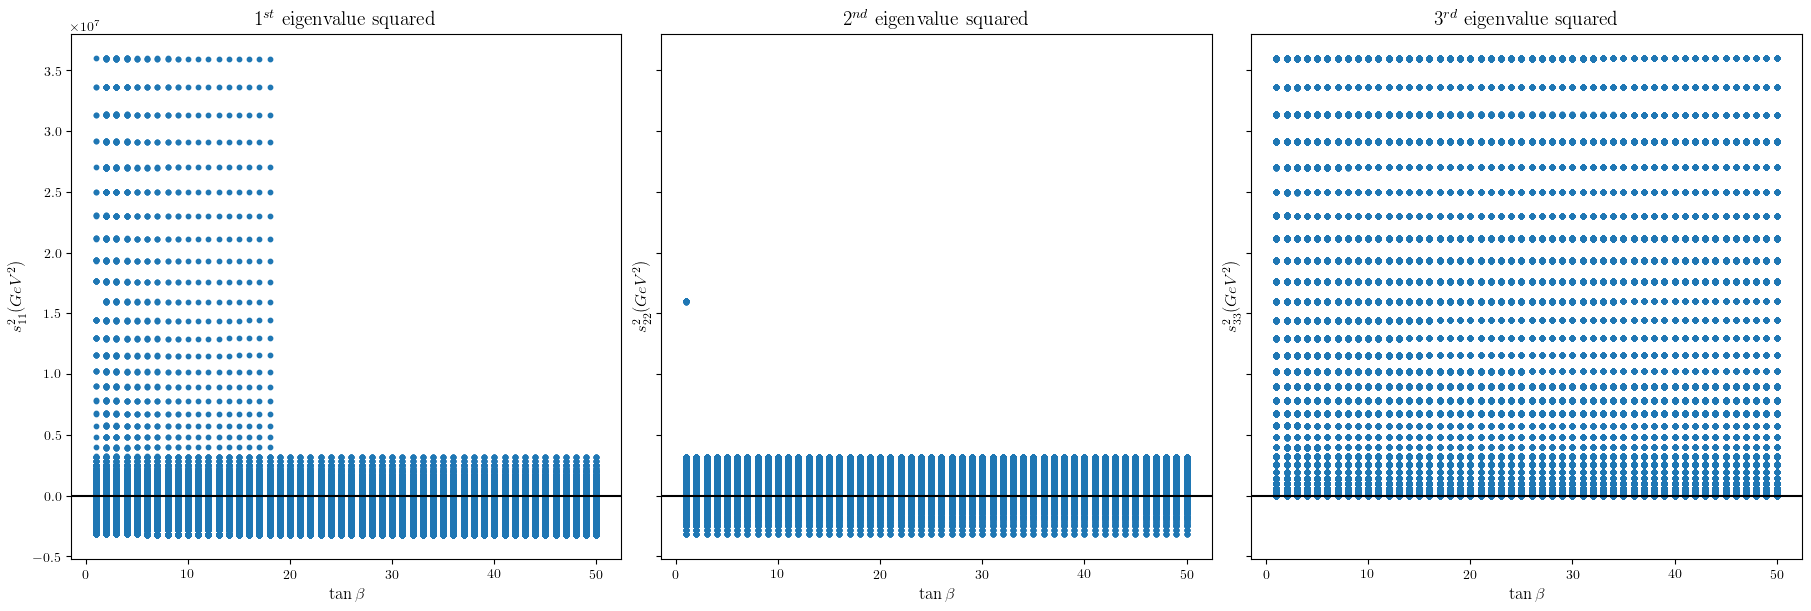

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, constrained_layout=True)

scatter1 = axes[0].scatter(nmssmDF['tb'], nmssmDF['s11'],s=10)
axes[0].set_title(r'$1^{st}$ eigenvalue squared', fontsize=14)
axes[0].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[0].set_ylabel(r'$s_{11}^2 (GeV^2)$', fontsize=12)
axes[0].axhline(y=0, color='black')

scatter2 = axes[1].scatter(nmssmDF['tb'], nmssmDF['s22'],s=10)
axes[1].set_title(r'$2^{nd}$ eigenvalue squared', fontsize=14)
axes[1].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[1].set_ylabel(r'$s_{22}^2 (GeV^2)$', fontsize=12)
axes[1].axhline(y=0, color='black')

scatter3 = axes[2].scatter(nmssmDF['tb'], nmssmDF['s33'],s=10)
axes[2].set_title(r'$3^{rd}$ eigenvalue squared', fontsize=14)
axes[2].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[2].set_ylabel(r'$s_{33}^2 (GeV^2)$', fontsize=12)
axes[2].axhline(y=0, color='black')

plt.show()


In [7]:
posDF = nmssmDF[(nmssmDF['s11'] >= 0) & (nmssmDF['s22'] >= 0) & (nmssmDF['s33'] >= 0)]
posDF.head(2)

,tb,M,mA,n,lam,s11,s22,s33
1400,1,1000,4000,0,0.01,3505.323463,1.600727e+07,3.0258
1401,1,1000,4000,0,0.11,3868.419441,1.600691e+07,366.1218


- From this dataframe we get that only for $tan \beta =1$ or $2$ we have all three eigenvalues positive. We also get that for $\tan \beta = 1$ we only have $m_A = 4000GeV$ and for $\tan \beta =2$ we only have $m_A=5000GeV$. 

In [8]:
np.unique(posDF[(posDF['tb'] == 2)]['lam'])

array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])

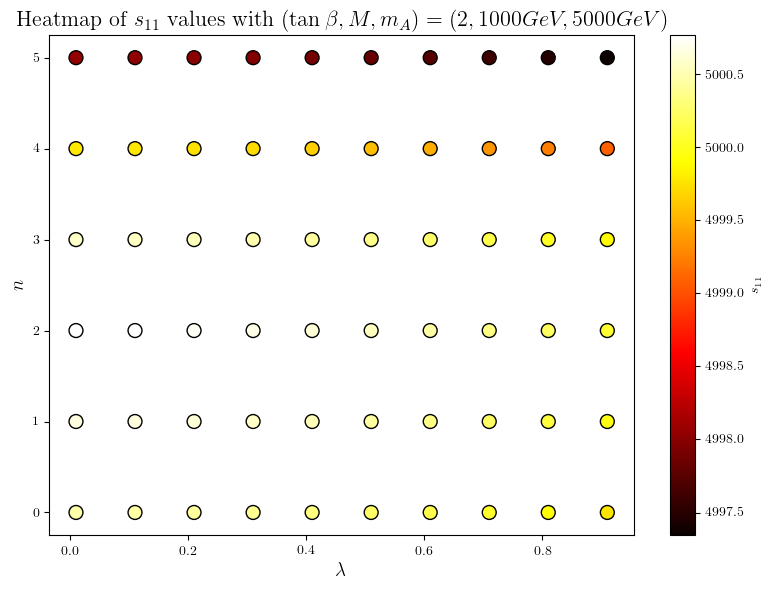

In [9]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(posDF[(posDF['mA']==5000)]['lam'], posDF[(posDF['mA']==5000)]['n'], c=np.sqrt(posDF[(posDF['mA']==5000)]['s11']), cmap='hot', s=100, edgecolor='k')
plt.colorbar(scatter, label=r'$s_{11}$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$n$', fontsize=14)
plt.title(r'Heatmap of $s_{11}$ values with $(\tan\beta , M, m_A)=(2,1000GeV, 5000GeV)$', fontsize=16)

plt.tight_layout()
plt.show()

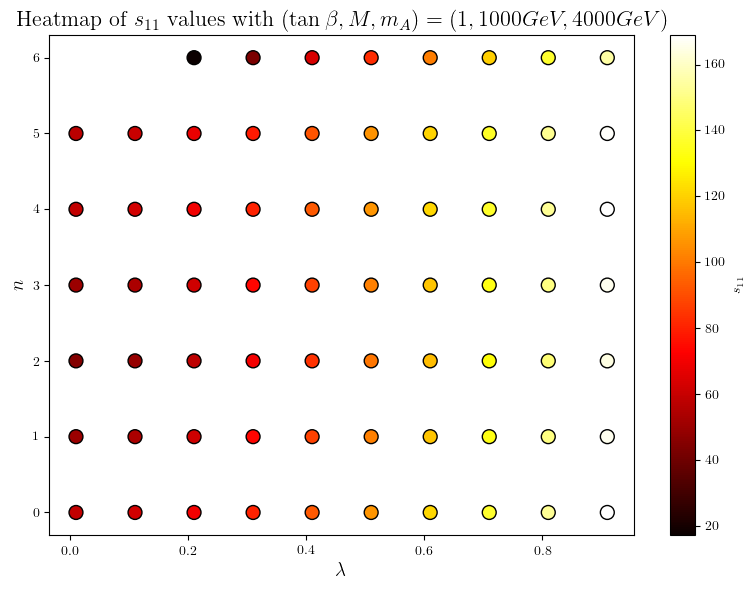

In [76]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(posDF[(posDF['mA']==4000)]['lam'], posDF[(posDF['mA']==4000)]['n'], c=np.sqrt(posDF[(posDF['mA']==4000)]['s11']), cmap='hot', s=100, edgecolor='k')
plt.colorbar(scatter, label=r'$s_{11}$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$n$', fontsize=14)
plt.title(r'Heatmap of $s_{11}$ values with $(\tan\beta , M, m_A)=(1,1000GeV, 4000GeV)$', fontsize=16)

plt.tight_layout()
plt.show()

## Plot eigenvalues as functions of $m_A$ keeping everything else fixed.

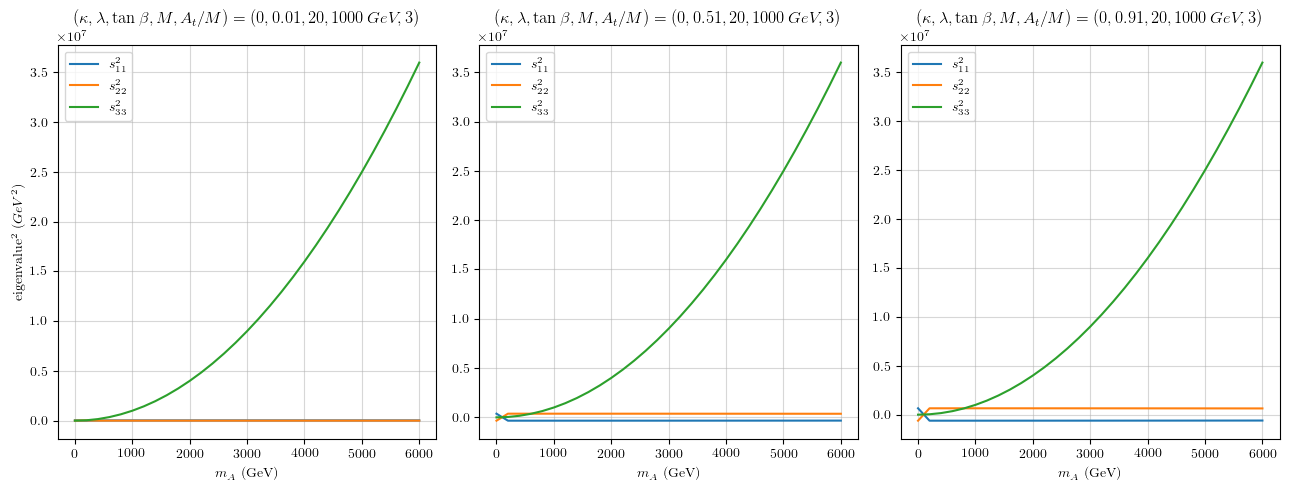

In [10]:
auxDF0p01 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]

# Create a figure with three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))  # Adjust figsize as needed

## 1st panel 
ax1.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
ax1.grid(alpha=0.5)
ax1.set_xlabel(r'$m_A$ (GeV)')
ax1.set_ylabel(r'$\rm eigenvalue^2$ $(GeV^2)$')
ax1.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.01,20,1000 \,GeV, 3)$', fontsize=12)
ax1.legend()

## 2nd panel
ax2.plot(auxDF0p51['mA'], auxDF0p51['s11'], label=r'$s_{11}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s22'], label=r'$s_{22}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s33'], label=r'$s_{33}^2$')
ax2.grid(alpha=0.5)
ax2.set_xlabel(r'$m_A$ (GeV)')
ax2.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.51,20,1000 \,GeV, 3)$', fontsize=12)
ax2.legend()

## 3rd panel
ax3.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
ax3.grid(alpha=0.5)
ax3.set_xlabel(r'$m_A$ (GeV)')
ax3.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.91,20,1000 \,GeV, 3)$', fontsize=12)
ax3.legend()


# Adjust layout
plt.tight_layout()

# Save and show the figure
#plt.savefig("", format="pdf", bbox_inches="tight")
plt.show()


In [94]:
# #Plot
# plt.figure(figsize=(8, 6))
# plt.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
# plt.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$', linestyle='--')
# plt.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
# plt.xlabel(r'$m_A$', fontsize=12)
# plt.ylabel(r'$\rm eigenvalue^2$ $(GeV^2)$', fontsize=12)
# plt.axhline(y=0, color='black', linestyle='--')
# plt.title(r'1-loop result from 1703.07800 for $( \kappa , \lambda , \tan \beta , M, A_t ) = (0,0.01,20,1000 \,GeV, 3000 \, GeV)$', fontsize=16)
# plt.grid()
# plt.xlim(0,500)
# plt.ylim(-1e+5,1e+5)
# plt.legend()
# plt.tight_layout()
# plt.show()


# #Plot
# plt.figure(figsize=(8, 6))
# plt.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
# plt.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
# plt.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
# plt.xlabel(r'$m_A$', fontsize=12)
# plt.ylabel(r'$\rm eigenvalue^2$ $(GeV^2)$', fontsize=12)
# plt.axhline(y=0, color='black', linestyle='--')
# plt.title(r'1-loop result from 1703.07800 for $( \kappa , \lambda , \tan \beta , M, A_t ) = (0,0.51,20,1000 \,GeV, 3000 \, GeV)$', fontsize=16)
# plt.grid()
# plt.xlim(0,500)
# plt.ylim(-1e+5,1e+5)
# plt.legend()
# plt.tight_layout()
# plt.show()

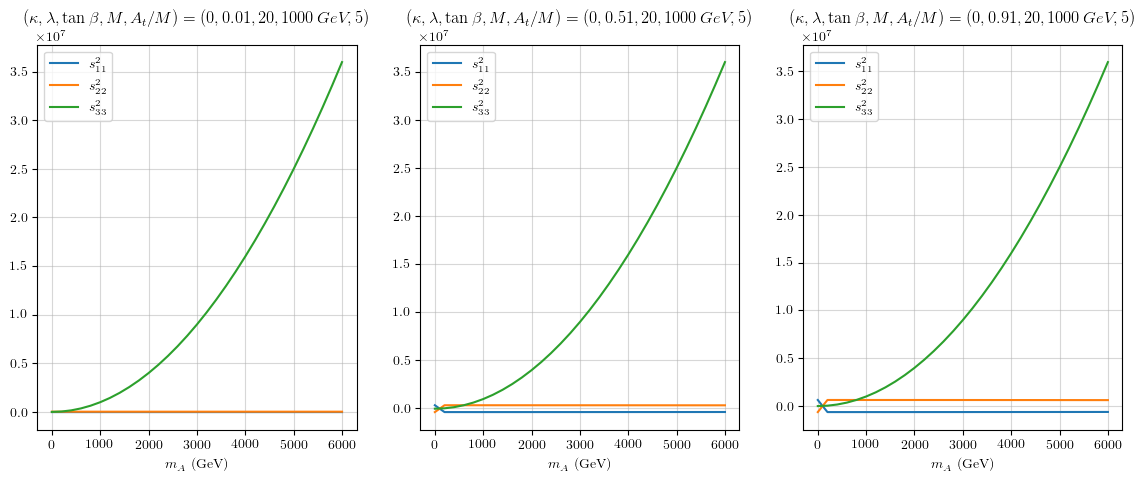

In [10]:
auxDF0p01 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 5) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 5) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 5) &(nmssmDF['M'] == 1000)]

# Create a figure with three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))  # Adjust figsize as needed

## 1st panel 
ax1.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
ax1.grid(alpha=0.5)
ax1.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t /M ) = (0,0.01,20,1000 \,GeV, 5)$', fontsize=12)
ax1.set_xlabel(r'$m_A$ (GeV)')
ax1.legend()

## 2nd panel
ax2.plot(auxDF0p51['mA'], auxDF0p51['s11'], label=r'$s_{11}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s22'], label=r'$s_{22}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s33'], label=r'$s_{33}^2$')
ax2.grid(alpha=0.5)
ax2.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.51,20,1000 \,GeV, 5)$', fontsize=12)
ax2.set_xlabel(r'$m_A$ (GeV)')
ax2.legend()

## 3rd panel
ax3.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
ax3.grid(alpha=0.5)
ax3.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.91,20,1000 \,GeV, 5)$', fontsize=12)
ax3.set_xlabel(r'$m_A$ (GeV)')
ax3.legend()

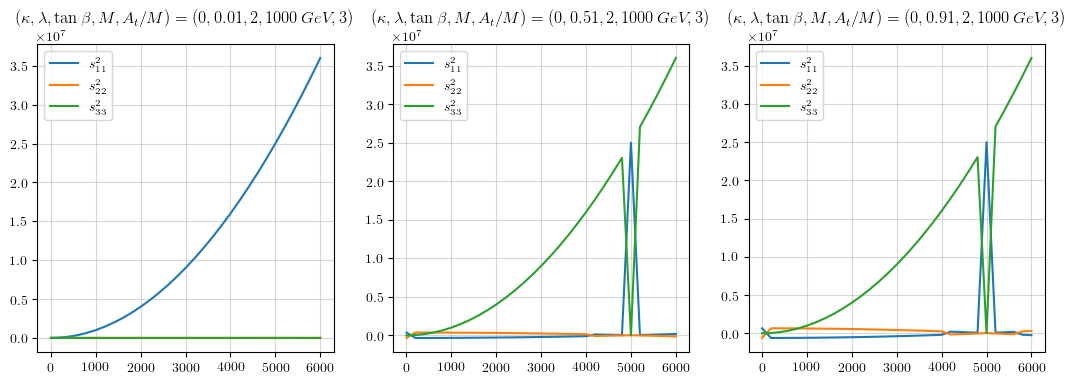

In [132]:
auxDF0p01 = nmssmDF[(nmssmDF['tb'] == 2) &(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['tb'] == 2) &(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['tb'] == 2) &(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]

# Create a figure with three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))  # Adjust figsize as needed

## 1st panel 
ax1.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
ax1.grid(alpha=0.5)
ax1.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t /M ) = (0,0.01,2,1000 \,GeV, 3)$', fontsize=12)
ax1.legend()
#ax1.set_xlim(0,1000)
#ax1.set_ylim(-1e+6,1e+6)

## 2nd panel
ax2.plot(auxDF0p51['mA'], auxDF0p51['s11'], label=r'$s_{11}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s22'], label=r'$s_{22}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s33'], label=r'$s_{33}^2$')
ax2.grid(alpha=0.5)
ax2.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.51,2,1000 \,GeV, 3)$', fontsize=12)
ax2.legend()
#ax2.set_xlim(0,1000)
#ax2.set_ylim(-1e+6,1e+6)

## 3rd panel
ax3.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
ax3.grid(alpha=0.5)
ax3.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.91,2,1000 \,GeV, 3)$', fontsize=12)
ax3.legend()
#ax3.set_xlim(0,1000)
#ax3.set_ylim(-1e+6,1e+6)



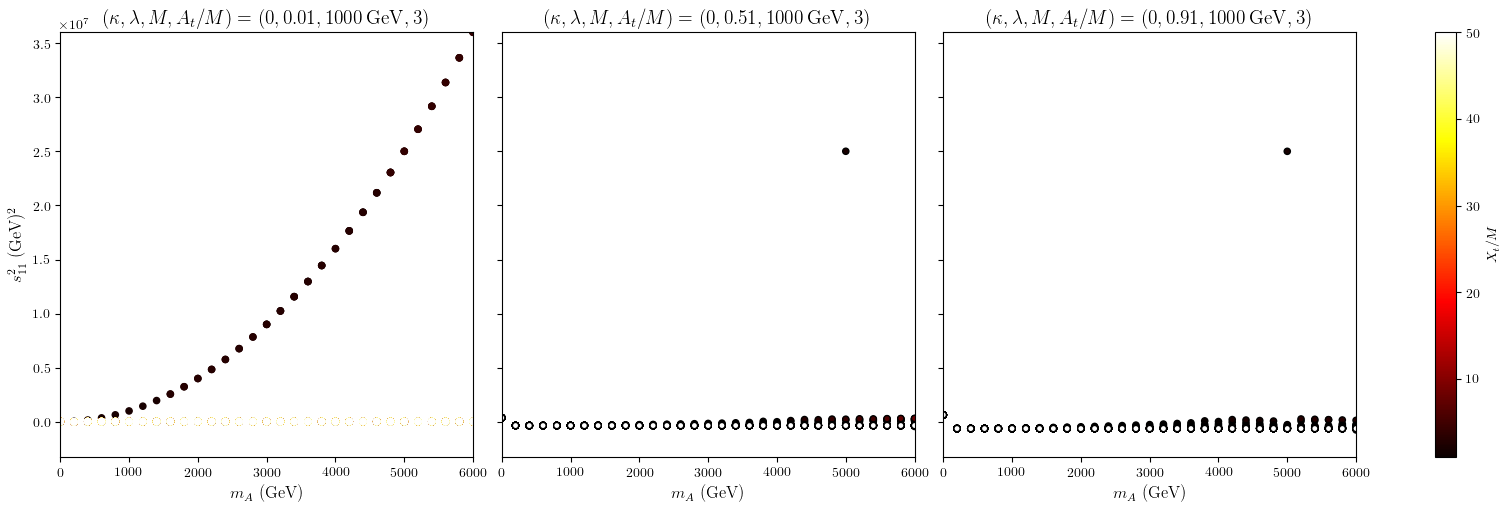

In [11]:
auxDF0p01 = nmssmDF[(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Plot each heatmap on its respective axis
scatter1 = axes[0].scatter(auxDF0p01['mA'], auxDF0p01['s11'], c=auxDF0p01['tb'], cmap='hot', s=20)
# scatter1 = axes[0].scatter(auxDF0p01['mA'], auxDF0p01['s22'], c=auxDF0p01['tb'], cmap='hot', s=20)
# scatter1 = axes[0].scatter(auxDF0p01['mA'], auxDF0p01['s33'], c=auxDF0p01['tb'], cmap='hot', s=20)
axes[0].set_title(r'$(\kappa, \lambda, M, A_t/M) = (0,0.01,1000 \, \rm GeV, 3)$', fontsize=14)
axes[0].set_xlabel(r'$m_A$ (GeV) ', fontsize=12)
axes[0].set_ylabel(r'$s_{11}^2$ $(\rm GeV)^2$', fontsize=12)
axes[0].set_xlim(nmssmDF['mA'].min(), nmssmDF['mA'].max())
axes[0].set_ylim(nmssmDF['s11'].min(), nmssmDF['s11'].max())


scatter2 = axes[1].scatter(auxDF0p51['mA'], auxDF0p51['s11'], c=auxDF0p51['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter2 = axes[1].scatter(auxDF0p51['mA'], auxDF0p51['s22'], c=auxDF0p51['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter2 = axes[1].scatter(auxDF0p51['mA'], auxDF0p51['s33'], c=auxDF0p51['tb'], cmap='hot',s=20,  edgecolor='k')

axes[1].set_title(r'$(\kappa, \lambda, M, A_t/M) = (0,0.51,1000 \, \rm GeV, 3)$', fontsize=14)
axes[1].set_xlabel(r'$m_A$ (GeV)', fontsize=12)

scatter3 = axes[2].scatter(auxDF0p91['mA'], auxDF0p91['s11'], c=auxDF0p91['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter3 = axes[2].scatter(auxDF0p91['mA'], auxDF0p91['s22'], c=auxDF0p91['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter3 = axes[2].scatter(auxDF0p91['mA'], auxDF0p91['s33'], c=auxDF0p91['tb'], cmap='hot',s=20,  edgecolor='k')

axes[2].set_title(r'$(\kappa, \lambda, M, A_t/M) = (0,0.91,1000 \, \rm GeV, 3)$', fontsize=14)
axes[2].set_xlabel(r'$m_A$ (GeV)', fontsize=12)


# Add a single colorbar for all plots
fig.colorbar(scatter1, ax=axes, location='right', label=r'$X_t/M$')
#plt.ylim(0.1,1)
# Display the plot
plt.show()



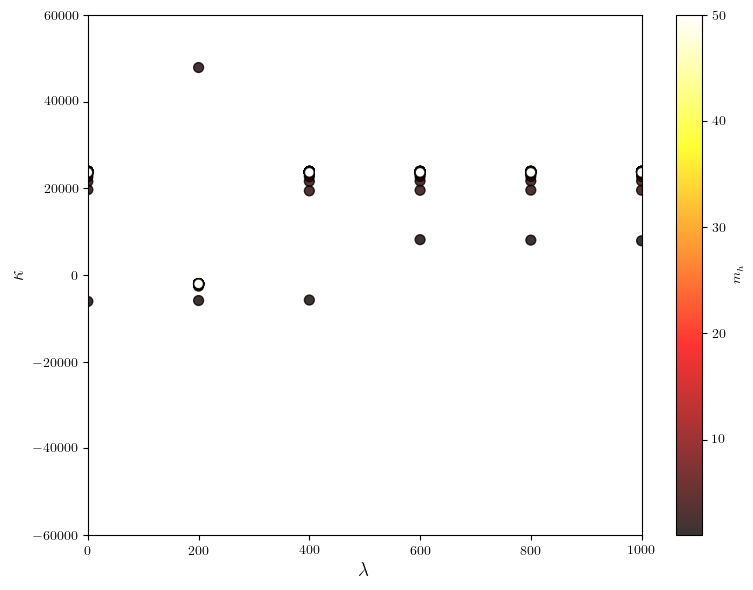

In [127]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(auxDF0p01['mA'], auxDF0p01['s11'], c=auxDF0p01['tb'], cmap='hot',s=50,  edgecolor='k', alpha=0.8)
plt.colorbar(scatter, label=r'$m_h$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$\kappa$', fontsize=14)
plt.ylim(-60e+3,60e+3)
plt.xlim(0,1000)
plt.tight_layout()
plt.show()

# Plot $A_t /M$ Vs $\lambda$ for a few $\tan \beta$ values with $\kappa = 0$ including all the sampled $m_A$ values 

In [12]:
DFtanb2 = nmssmDF[(nmssmDF['tb'] == 2)]
DFtanb20 = nmssmDF[(nmssmDF['tb'] == 20)]
DFtanb50= nmssmDF[(nmssmDF['tb'] == 50)]

### $M=1000 \, GeV$

In [10]:
DFtanb2M1000 = DFtanb2[DFtanb2['M'] == 1000]
DFtanb20M1000 = DFtanb20[DFtanb20['M'] == 1000]
DFtanb50M1000 = DFtanb50[DFtanb50['M'] == 1000]

In [33]:
# # Separate positive and negative values
# positive_s11 = DFtanb2M1000['s11'] > 0
# negative_s11 = DFtanb2M1000['s11'] < 0

# # Transform values to log scale
# log_positive = np.log10(np.clip(DFtanb2M1000.loc[positive_s11, 's11'], a_min=1e-10, a_max=None))
# log_negative = np.log10(np.clip(-DFtanb2M1000.loc[negative_s11, 's11'], a_min=1e-10, a_max=None))

# # Create the figure and axes
# fig, ax = plt.subplots(figsize=(6, 4))

# # Plot positive values
# scatter_pos = ax.scatter(
#     DFtanb2M1000.loc[positive_s11, 'n'], 
#     DFtanb2M1000.loc[positive_s11, 'lam'], 
#     c=log_positive, cmap='Reds', s=50, edgecolor='k', alpha=0.8, marker='s'
# )

# # Plot negative values
# scatter_neg = ax.scatter(
#     DFtanb2M1000.loc[negative_s11, 'n'], 
#     DFtanb2M1000.loc[negative_s11, 'lam'], 
#     c=log_negative, cmap='Blues', s=50, edgecolor='k', alpha=0.1
# )

# # Add separate colorbars
# cbar_pos = plt.colorbar(scatter_pos, ax=ax, label=r'$\log_{10}(s_{11}^2)$ (positive)')
# cbar_neg = plt.colorbar(scatter_neg, ax=ax, label=r'$\log_{10}(-s_{11}^2)$ (negative)', pad=0.15)

# # Add labels and adjust layout
# ax.set_xlabel(r'$A_t / M$', fontsize=14)
# ax.set_ylabel(r'$\lambda$', fontsize=14)
# plt.tight_layout()
# plt.show()


In [42]:
# # Filter points where s11 > 0
# positive_points = DFtanb2M1000[DFtanb2M1000['s11'] > 0]

# # Further filter points where s22 >= 0 and s33 >= 0 --- Just require three positive eigenvalues no restriction on the order

# # highlighted_points = positive_points[
# #     (positive_points['s22'] >= 0) & 
# #     (positive_points['s33'] >= 0)
# # ]
# # Further filter points where s33 > s11 > 0 and s22 > s11 > 0 --- Require the necessary ordering for the SM higgs to work
# highlighted_points = positive_points[
#     (positive_points['s33'] > positive_points['s11']) & 
#     (positive_points['s22'] > positive_points['s11'])
# ]

# # Plotting the heat map
# plt.figure(figsize=(8, 6))

# # Plot all positive points
# scatter = plt.scatter(
#     positive_points['n'], 
#     positive_points['lam'], 
#     c=positive_points['s11'], 
#     cmap='hot', 
#     s=50, 
#     edgecolor='k', 
#     alpha=0.8,
#     label='s11 > 0'
# )

# # Highlight points with s22 >= 0 and s33 >= 0 using square markers
# highlight_scatter = plt.scatter(
#     highlighted_points['n'], 
#     highlighted_points['lam'], 
#     c=highlighted_points['s11'],  # Use the same color mapping
#     cmap='hot',                   # Same colormap
#     s=80,                         # Larger marker size
#     marker='s',                   # Square marker
#     edgecolor='k',                # Keep the edge color consistent
#     alpha=0.8
# )

# plt.colorbar(scatter, label=r'$s_{11}^2$')
# plt.xlabel(r'$A_t / M$', fontsize=14)
# plt.ylabel(r'$\lambda$', fontsize=14)
# plt.title(r'$\tan \beta = 2$, $M=1000 \, GeV$, $m_A \in [0,6000] \, GeV$')
# #plt.legend([r'$s_{11}^2 \leq 0$', r'$s_{22}^2 \leq 0$, $s_{33}^2 \leq 0$'], loc='upper right')
# plt.tight_layout()
# plt.show()


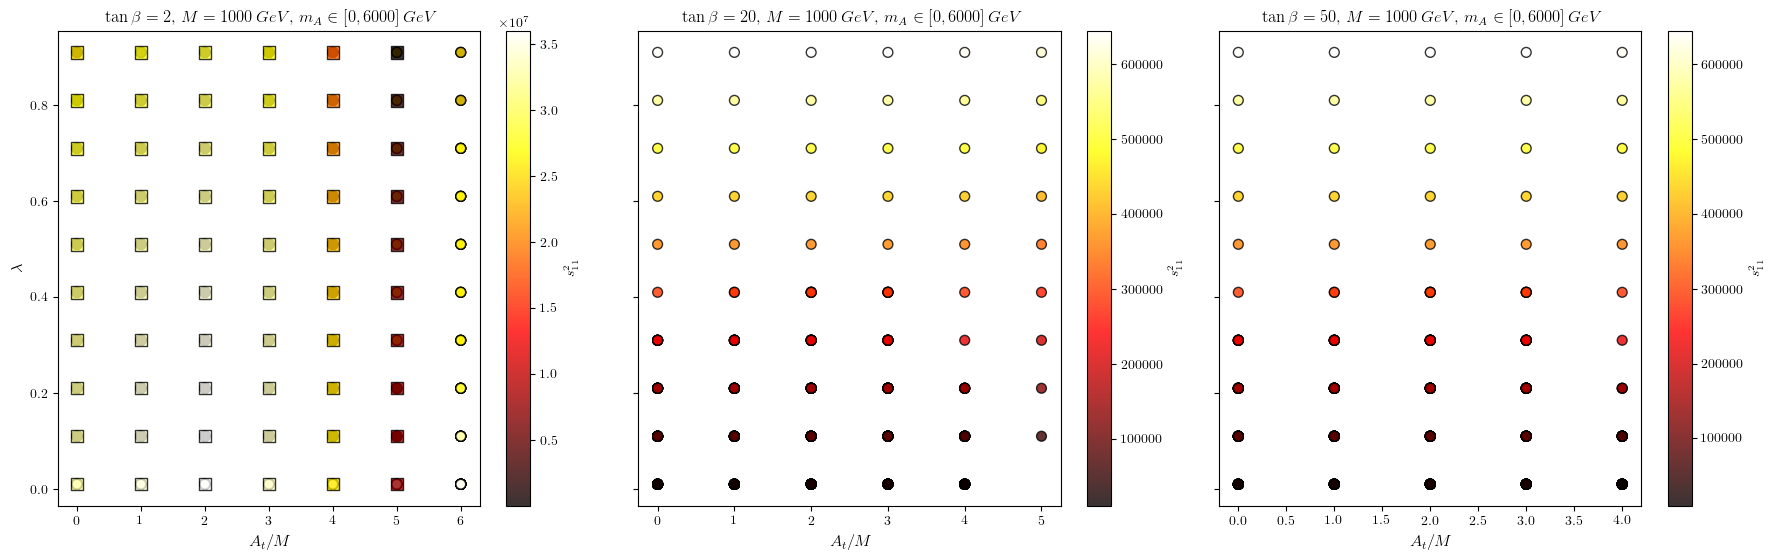

In [41]:
# Filtering conditions
# Filter for Panel 1
positive_points2 = DFtanb2M1000[DFtanb2M1000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points2 = positive_points2[
    (positive_points2['s22'] >= 0) & 
    (positive_points2['s33'] >= 0)]

# ## filter for the correct order of eigenvalues  
# highlighted_points2 = positive_points2[
#     (positive_points2['s33'] > positive_points2['s11']) & 
#     (positive_points2['s22'] > positive_points2['s11'])]

# Filter for Panel 2
positive_points20 = DFtanb20M1000[DFtanb20M1000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points20 = positive_points20[
    (positive_points20['s22'] >= 0) & 
    (positive_points20['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points20 = positive_points20[
#     (positive_points20['s33'] > positive_points20['s11']) & 
#     (positive_points20['s22'] > positive_points20['s11'])]

# Filter for Panel 3
positive_points50 = DFtanb50M1000[DFtanb50M1000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points50 = positive_points50[
    (positive_points50['s22'] >= 0) & 
    (positive_points50['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points50 = positive_points50[
#     (positive_points50['s33'] > positive_points50['s11']) & 
#     (positive_points50['s22'] > positive_points50['s11'])]

# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter(
    positive_points2['n'], 
    positive_points2['lam'], 
    c=positive_points2['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[0].scatter(
    highlighted_points2['n'], 
    highlighted_points2['lam'], 
    c=highlighted_points2['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[0].set_title(r'$\tan \beta =2$, $ M = 1000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[0].set_xlabel(r'$A_t / M$', fontsize=12)
axes[0].set_ylabel(r'$\lambda$', fontsize=12)
fig.colorbar(scatter1, ax=axes[0], label=r'$s_{11}^2$')

# Panel 2
scatter2 = axes[1].scatter(
    positive_points20['n'], 
    positive_points20['lam'], 
    c=positive_points20['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[1].scatter(
    highlighted_points20['n'], 
    highlighted_points20['lam'], 
    c=highlighted_points20['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[1].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[1].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter2, ax=axes[1], label=r'$s_{11}^2$')

# Panel 3
scatter3 = axes[2].scatter(
    positive_points50['n'], 
    positive_points50['lam'], 
    c=positive_points50['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[2].scatter(
    highlighted_points50['n'], 
    highlighted_points50['lam'], 
    c=highlighted_points50['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)
axes[2].set_title(r'$\tan \beta =50$, $ M = 1000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[2].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter3, ax=axes[2], label=r'$s_{11}^2$')

# Adjust layout
# plt.suptitle(r'$\tan \beta = 2$, $M=1000 \, GeV$, $m_A \in [0,6000] \, GeV$', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### $M=2000 \, GeV$

In [43]:
DFtanb2M2000 = DFtanb2[DFtanb2['M'] == 2000]
DFtanb20M2000 = DFtanb20[DFtanb20['M'] == 2000]
DFtanb50M2000 = DFtanb50[DFtanb50['M'] == 2000]

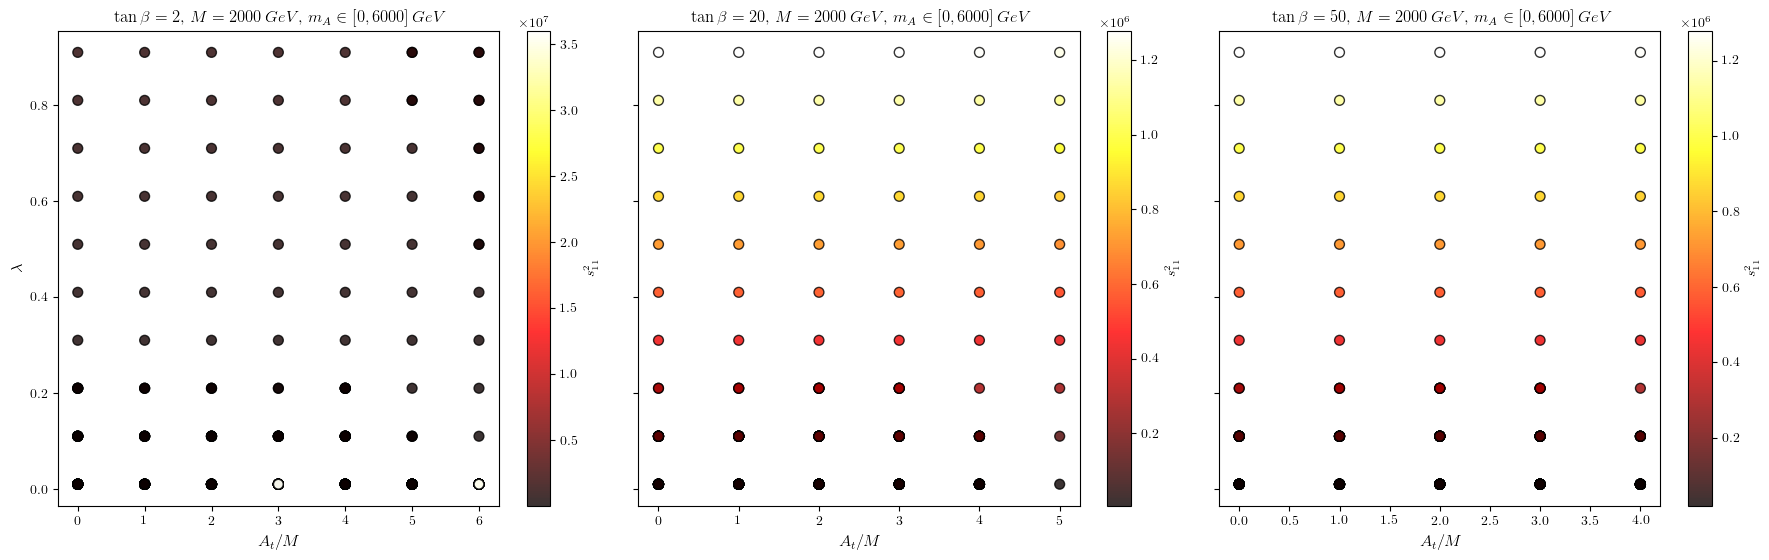

In [44]:
# Filtering conditions
# Filter for Panel 1
positive_points2 = DFtanb2M2000[DFtanb2M2000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points2 = positive_points2[
    (positive_points2['s22'] >= 0) & 
    (positive_points2['s33'] >= 0)]

# ## filter for the correct order of eigenvalues  
# highlighted_points2 = positive_points2[
#     (positive_points2['s33'] > positive_points2['s11']) & 
#     (positive_points2['s22'] > positive_points2['s11'])]

# Filter for Panel 2
positive_points20 = DFtanb20M2000[DFtanb20M2000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points20 = positive_points20[
    (positive_points20['s22'] >= 0) & 
    (positive_points20['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points20 = positive_points20[
#     (positive_points20['s33'] > positive_points20['s11']) & 
#     (positive_points20['s22'] > positive_points20['s11'])]

# Filter for Panel 3
positive_points50 = DFtanb50M2000[DFtanb50M2000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points50 = positive_points50[
    (positive_points50['s22'] >= 0) & 
    (positive_points50['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points50 = positive_points50[
#     (positive_points50['s33'] > positive_points50['s11']) & 
#     (positive_points50['s22'] > positive_points50['s11'])]

# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter(
    positive_points2['n'], 
    positive_points2['lam'], 
    c=positive_points2['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[0].scatter(
    highlighted_points2['n'], 
    highlighted_points2['lam'], 
    c=highlighted_points2['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[0].set_title(r'$\tan \beta =2$, $ M = 2000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[0].set_xlabel(r'$A_t / M$', fontsize=12)
axes[0].set_ylabel(r'$\lambda$', fontsize=12)
fig.colorbar(scatter1, ax=axes[0], label=r'$s_{11}^2$')

# Panel 2
scatter2 = axes[1].scatter(
    positive_points20['n'], 
    positive_points20['lam'], 
    c=positive_points20['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[1].scatter(
    highlighted_points20['n'], 
    highlighted_points20['lam'], 
    c=highlighted_points20['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[1].set_title(r'$\tan \beta =20$, $ M = 2000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[1].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter2, ax=axes[1], label=r'$s_{11}^2$')

# Panel 3
scatter3 = axes[2].scatter(
    positive_points50['n'], 
    positive_points50['lam'], 
    c=positive_points50['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[2].scatter(
    highlighted_points50['n'], 
    highlighted_points50['lam'], 
    c=highlighted_points50['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)
axes[2].set_title(r'$\tan \beta =50$, $ M = 2000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[2].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter3, ax=axes[2], label=r'$s_{11}^2$')

# Adjust layout
# plt.suptitle(r'$\tan \beta = 2$, $M=1000 \, GeV$, $m_A \in [0,6000] \, GeV$', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### $M=5000 \, GeV$

In [45]:
DFtanb2M5000 = DFtanb2[DFtanb2['M'] == 5000]
DFtanb20M5000 = DFtanb20[DFtanb20['M'] == 5000]
DFtanb50M5000 = DFtanb50[DFtanb50['M'] == 5000]

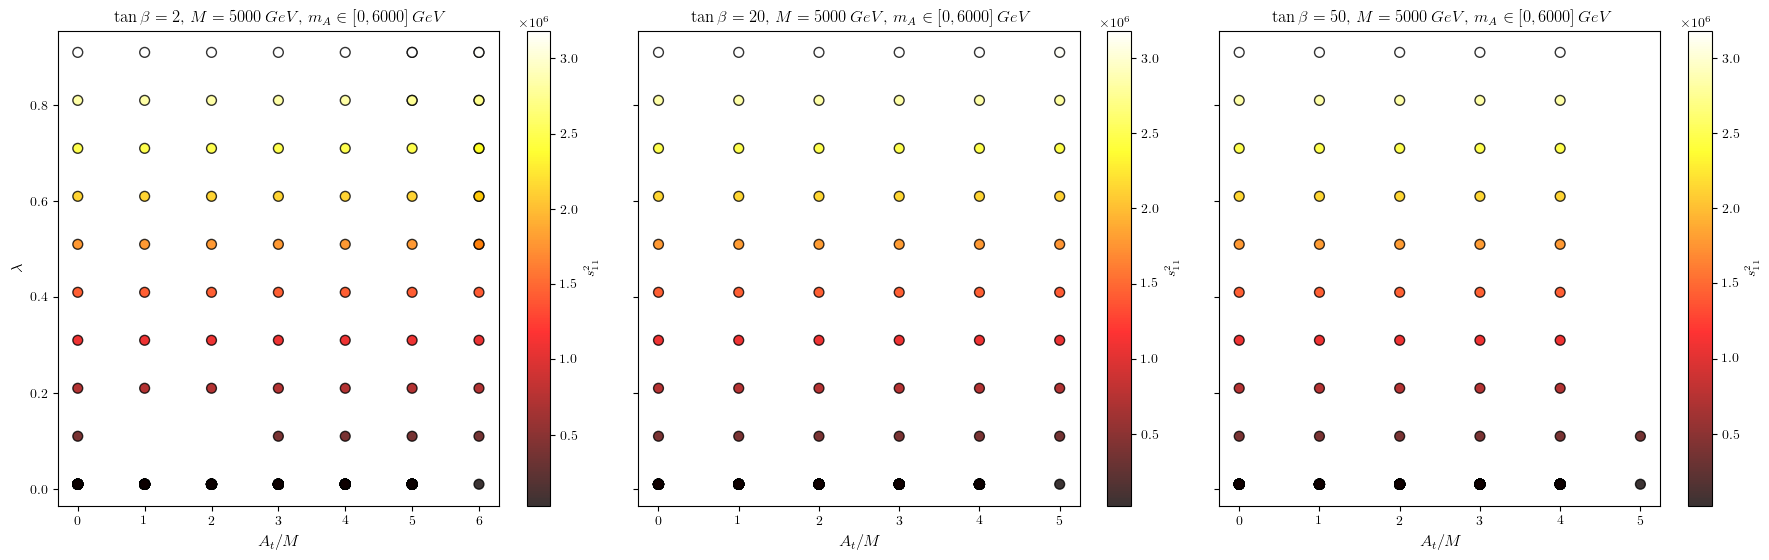

In [46]:
# Filtering conditions
# Filter for Panel 1
positive_points2 = DFtanb2M5000[DFtanb2M5000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points2 = positive_points2[
    (positive_points2['s22'] >= 0) & 
    (positive_points2['s33'] >= 0)]

# ## filter for the correct order of eigenvalues  
# highlighted_points2 = positive_points2[
#     (positive_points2['s33'] > positive_points2['s11']) & 
#     (positive_points2['s22'] > positive_points2['s11'])]

# Filter for Panel 2
positive_points20 = DFtanb20M5000[DFtanb20M5000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points20 = positive_points20[
    (positive_points20['s22'] >= 0) & 
    (positive_points20['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points20 = positive_points20[
#     (positive_points20['s33'] > positive_points20['s11']) & 
#     (positive_points20['s22'] > positive_points20['s11'])]

# Filter for Panel 3
positive_points50 = DFtanb50M5000[DFtanb50M5000['s11'] > 0]

## simply require three positive eigenvalues
highlighted_points50 = positive_points50[
    (positive_points50['s22'] >= 0) & 
    (positive_points50['s33'] >= 0)]

# # ## filter for the correct order of eigenvalues  
# highlighted_points50 = positive_points50[
#     (positive_points50['s33'] > positive_points50['s11']) & 
#     (positive_points50['s22'] > positive_points50['s11'])]

# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter(
    positive_points2['n'], 
    positive_points2['lam'], 
    c=positive_points2['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[0].scatter(
    highlighted_points2['n'], 
    highlighted_points2['lam'], 
    c=highlighted_points2['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[0].set_title(r'$\tan \beta =2$, $ M = 5000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[0].set_xlabel(r'$A_t / M$', fontsize=12)
axes[0].set_ylabel(r'$\lambda$', fontsize=12)
fig.colorbar(scatter1, ax=axes[0], label=r'$s_{11}^2$')

# Panel 2
scatter2 = axes[1].scatter(
    positive_points20['n'], 
    positive_points20['lam'], 
    c=positive_points20['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[1].scatter(
    highlighted_points20['n'], 
    highlighted_points20['lam'], 
    c=highlighted_points20['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)

axes[1].set_title(r'$\tan \beta =20$, $ M = 5000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[1].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter2, ax=axes[1], label=r'$s_{11}^2$')

# Panel 3
scatter3 = axes[2].scatter(
    positive_points50['n'], 
    positive_points50['lam'], 
    c=positive_points50['s11'], 
    cmap='hot', 
    s=50, 
    edgecolor='k', 
    alpha=0.8,
    label='s11 > 0'
)

# Highlight points with s22 , s33 > s11 using square markers
highlight_scatter = axes[2].scatter(
    highlighted_points50['n'], 
    highlighted_points50['lam'], 
    c=highlighted_points50['s11'],  # Use the same color mapping
    cmap='hot',                   # Same colormap
    s=80,                         # Larger marker size
    marker='s',                   # Square marker
    edgecolor='k',                # Keep the edge color consistent
    alpha=0.8
)
axes[2].set_title(r'$\tan \beta =50$, $ M = 5000 \, GeV$, $m_A \in [0,6000] \, GeV$')
axes[2].set_xlabel(r'$A_t / M$', fontsize=12)
fig.colorbar(scatter3, ax=axes[2], label=r'$s_{11}^2$')

# Adjust layout
# plt.suptitle(r'$\tan \beta = 2$, $M=1000 \, GeV$, $m_A \in [0,6000] \, GeV$', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# NMSSM points sampled for $\kappa ,  A_{\kappa} \neq 0$ --- using 1-loop analytic expression from 1703.07800

In [4]:
kappa_nmssmDF = pd.read_csv('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/nonzero_kappa_sampling_points_expressions_1703p07800.csv')
kappa_nmssmDF.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
0,1,1000,0,0,0.001,0.01,-1000,-4.098566e+04,2829.431533,8935.829190
1,1,1000,0,0,0.101,0.01,-1000,1.611960e+09,2059.331910,8719.931577


In [5]:
kappa_nmssmDF.shape

(21700000, 10)

In [6]:
aux2 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'])]


- **From the figure below it seems like in the case of a full NMSSM (non zero $\kappa, A_{\kappa}$) things can possibly work!**

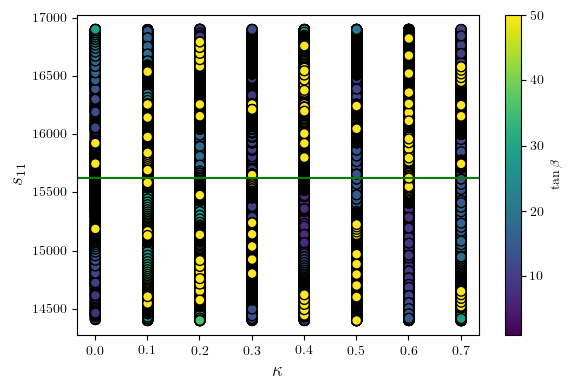

In [7]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(aux2['kappa'], aux2['s11'], c=aux2['tb'], cmap='viridis',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$\tan \beta$')

plt.xlabel(r'$\kappa$', fontsize=14)
plt.ylabel(r'$s_{11}$', fontsize=14)
# plt.ylim(-60e+3,60e+3)
# plt.xlim(0,1000)
plt.axhline(y=125 * 125 , color='green')
plt.tight_layout()
plt.show()


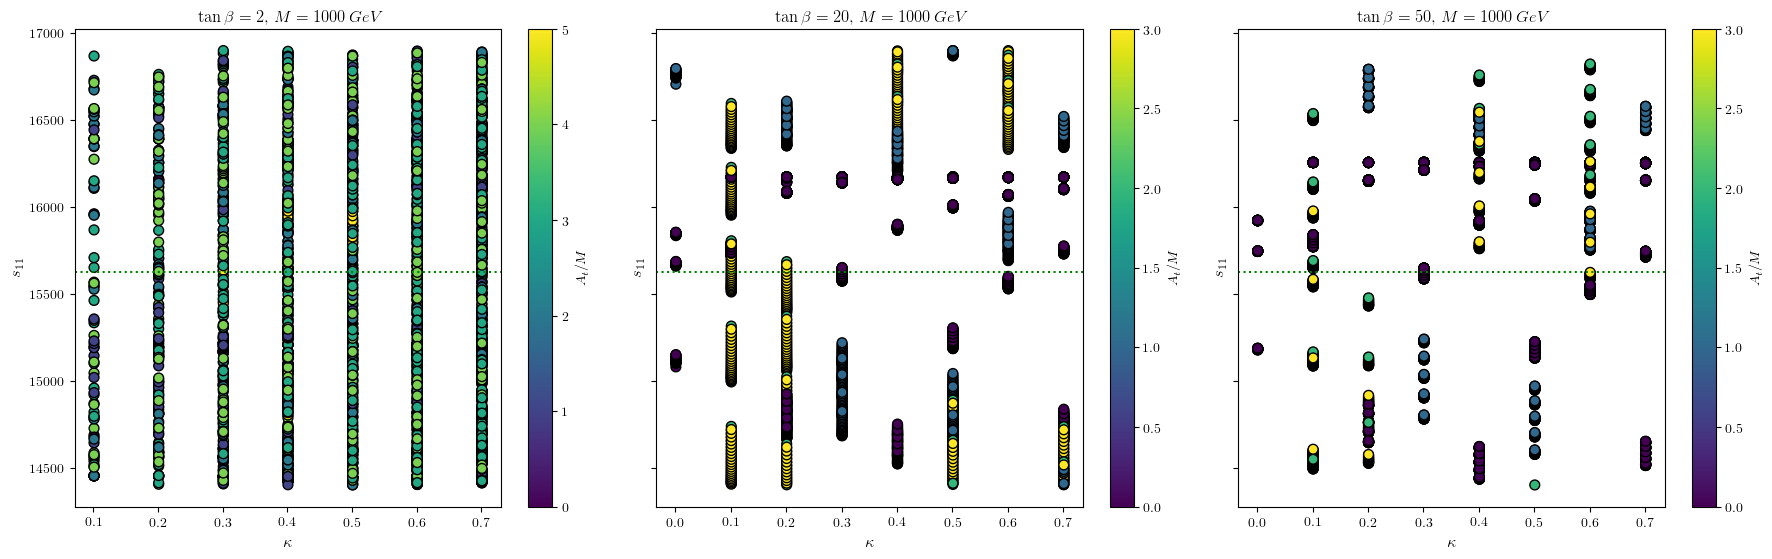

In [8]:
## Choose a few tanbeta values and fixed mass and then plot

aux_tb2 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 2)]
aux_tb20 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 20)]
aux_tb50 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 50)]

# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( aux_tb2['kappa'], aux_tb2['s11'], c =  aux_tb2['n'], cmap='viridis' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =2$, $ M = 1000 \, GeV$')
axes[0].set_xlabel(r'$\kappa$', fontsize=12)
axes[0].set_ylabel(r'$s_{11}$', fontsize=12)
axes[0].axhline(y=125*125, color='green', linestyle=':')
fig.colorbar(scatter1, ax=axes[0], label=r'$A_t/M$')

# Panel 2
scatter2 = axes[1].scatter( aux_tb20['kappa'], aux_tb20['s11'], c =  aux_tb20['n'], cmap='viridis' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$')
axes[1].set_xlabel(r'$\kappa$', fontsize=12)
axes[1].set_ylabel(r'$s_{11}$', fontsize=12)
axes[1].axhline(y=125*125, color='green', linestyle=':')
fig.colorbar(scatter2, ax=axes[1], label=r'$A_t/M$')

# Panel 3
scatter3 = axes[2].scatter( aux_tb50['kappa'], aux_tb50['s11'], c =  aux_tb50['n'], cmap='viridis' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =50$, $ M = 1000 \, GeV$')
axes[2].set_xlabel(r'$\kappa$', fontsize=12)
axes[2].set_ylabel(r'$s_{11}$', fontsize=12)
axes[2].axhline(y=125*125, color='green', linestyle=':')
fig.colorbar(scatter3, ax=axes[2], label=r'$A_t/M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


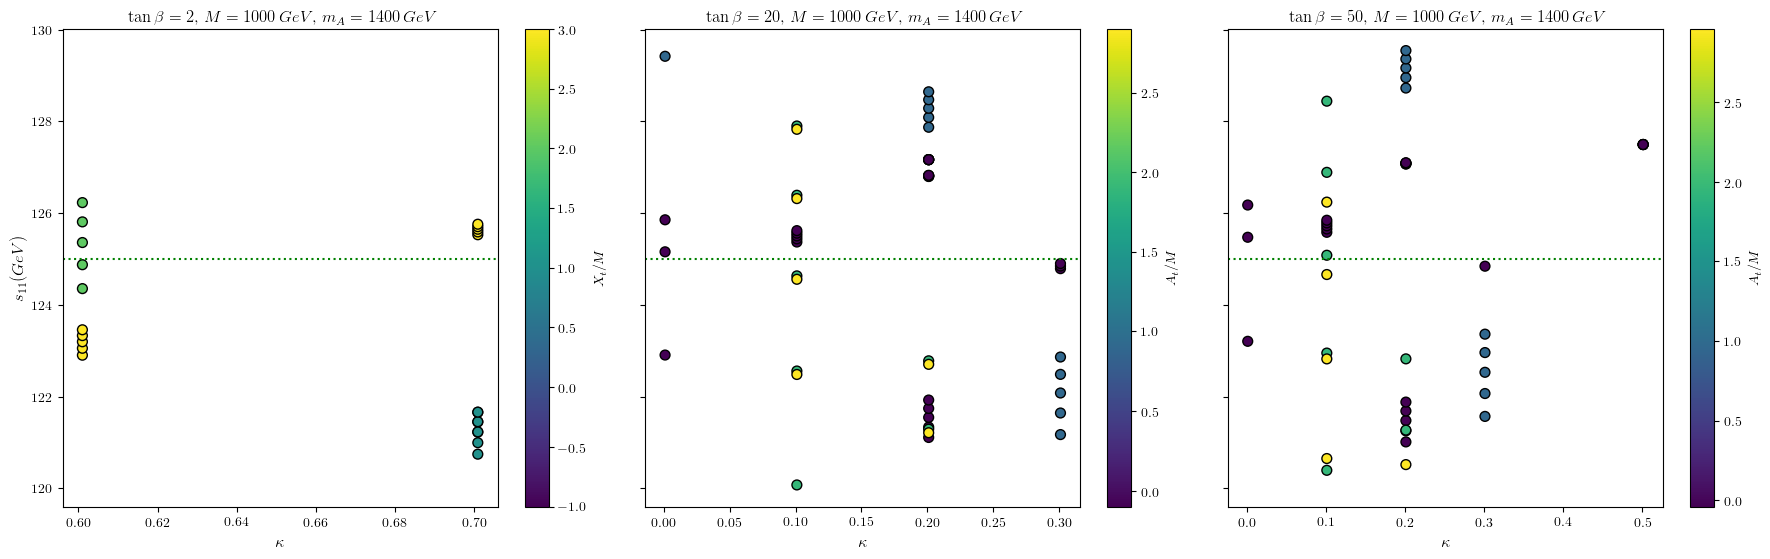

In [9]:
## Choose a few tanbeta values and fixed mass and then plot

aux_tb2 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 2)
                    & (kappa_nmssmDF['mA'] == 1400)].copy()
aux_tb2['Xt/M'] = aux_tb2['n'] - 2/ 2

aux_tb20 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 20)
                    & (kappa_nmssmDF['mA'] == 1400)].copy()
aux_tb20['Xt/M'] = aux_tb20['n'] - 2/ 20

aux_tb50 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 50)
                    & (kappa_nmssmDF['mA'] == 1400)].copy()
aux_tb50['Xt/M'] = aux_tb50['n'] - 2/ 50


# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( aux_tb2['kappa'], np.sqrt(aux_tb2['s11']), c =  aux_tb2['Xt/M'], cmap='viridis' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =2$, $ M = 1000 \, GeV$, $m_A = 1400 \, GeV$')
axes[0].set_xlabel(r'$\kappa$', fontsize=12)
axes[0].set_ylabel(r'$s_{11} (GeV)$', fontsize=12)
axes[0].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t/M$')

# Panel 2
scatter2 = axes[1].scatter( aux_tb20['kappa'], np.sqrt(aux_tb20['s11']), c =  aux_tb20['Xt/M'], cmap='viridis' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$, $m_A = 1400 \, GeV$')
axes[1].set_xlabel(r'$\kappa$', fontsize=12)
#axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[1].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter2, ax=axes[1], label=r'$A_t/M$')

# Panel 3
scatter3 = axes[2].scatter( aux_tb50['kappa'], np.sqrt(aux_tb50['s11']), c =  aux_tb50['Xt/M'], cmap='viridis' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =50$, $ M = 1000 \, GeV$, $m_A = 1400 \, GeV$')
axes[2].set_xlabel(r'$\kappa$', fontsize=12)
#axes[2].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[2].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter3, ax=axes[2], label=r'$A_t/M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


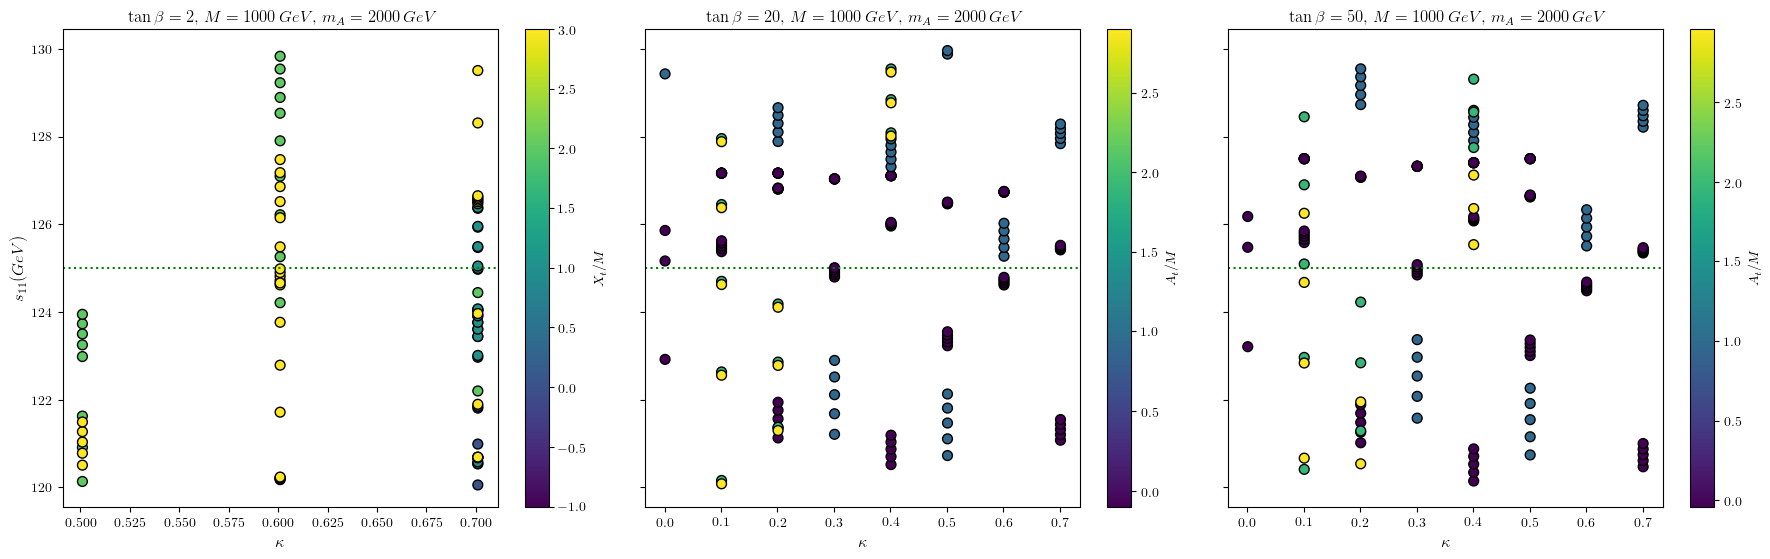

In [10]:
## Choose a few tanbeta values and fixed mass and then plot

aux_tb2 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 2)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_tb2['Xt/M'] = aux_tb2['n'] - 2/ 2

aux_tb20 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 20)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_tb20['Xt/M'] = aux_tb20['n'] - 2/ 20

aux_tb50 = kappa_nmssmDF[(kappa_nmssmDF['M'] == 1000) & (kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 50)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_tb50['Xt/M'] = aux_tb50['n'] - 2/ 50


# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( aux_tb2['kappa'], np.sqrt(aux_tb2['s11']), c =  aux_tb2['Xt/M'], cmap='viridis' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =2$, $ M = 1000 \, GeV$, $m_A = 2000 \, GeV$')
axes[0].set_xlabel(r'$\kappa$', fontsize=12)
axes[0].set_ylabel(r'$s_{11} (GeV)$', fontsize=12)
axes[0].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t/M$')

# Panel 2
scatter2 = axes[1].scatter( aux_tb20['kappa'], np.sqrt(aux_tb20['s11']), c =  aux_tb20['Xt/M'], cmap='viridis' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$, $m_A = 2000 \, GeV$')
axes[1].set_xlabel(r'$\kappa$', fontsize=12)
#axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[1].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter2, ax=axes[1], label=r'$A_t/M$')

# Panel 3
scatter3 = axes[2].scatter( aux_tb50['kappa'], np.sqrt(aux_tb50['s11']), c =  aux_tb50['Xt/M'], cmap='viridis' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =50$, $ M = 1000 \, GeV$, $m_A = 2000 \, GeV$')
axes[2].set_xlabel(r'$\kappa$', fontsize=12)
#axes[2].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[2].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter3, ax=axes[2], label=r'$A_t/M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- Based on the results I get for $3\sigma$ deviations from the SM detected at ILC500, I know what is the range of $(M,X_t/M)$ that I am interested in. 

In [11]:
aux_gen_tb2 = kappa_nmssmDF[(kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 2)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_gen_tb2['Xt/M'] = aux_gen_tb2['n'] - 2 / 2

aux_gen_tb20 = kappa_nmssmDF[(kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 20)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_gen_tb20['Xt/M'] = aux_gen_tb20['n'] - 2 / 20

aux_gen_tb50 = kappa_nmssmDF[(kappa_nmssmDF['s11'] > 120 * 120 ) & (kappa_nmssmDF['s11'] < 130 * 130 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 50)
                    & (kappa_nmssmDF['mA'] == 2000)].copy()
aux_gen_tb50['Xt/M'] = aux_gen_tb50['n'] - 2 / 50 



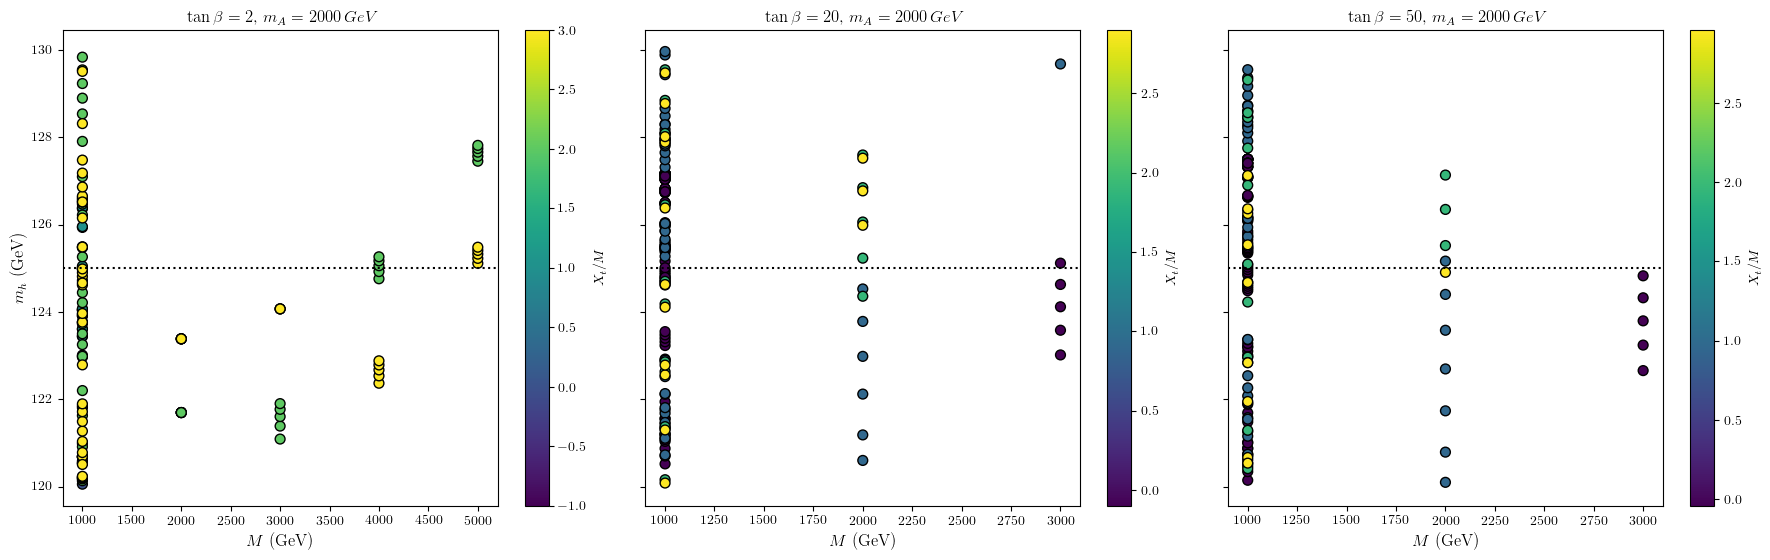

In [16]:
# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( aux_gen_tb2['M'], np.sqrt(aux_gen_tb2['s11']), c = aux_gen_tb2['Xt/M'], cmap='viridis' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =2$, $m_A = 2000 \, GeV$')
axes[0].set_xlabel(r'$M$ (GeV)', fontsize=12)
axes[0].set_ylabel(r'$m_h$ (GeV)', fontsize=12)
axes[0].axhline(y=125, linestyle=':', color='black')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t / M$')

# Panel 2
scatter2 = axes[1].scatter( aux_gen_tb20['M'], np.sqrt(aux_gen_tb20['s11']), c = aux_gen_tb20['Xt/M'], cmap='viridis' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $m_A = 2000 \, GeV$')
axes[1].set_xlabel(r'$M$ (GeV)', fontsize=12)
axes[1].axhline(y=125, linestyle=':', color='black')
#axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)

fig.colorbar(scatter2, ax=axes[1], label=r'$X_t / M$')

# Panel 3
scatter3 = axes[2].scatter( aux_gen_tb50['M'], np.sqrt(aux_gen_tb50['s11']), c = aux_gen_tb50['Xt/M'] , cmap='viridis' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =50$,  $m_A = 2000 \, GeV$')
axes[2].set_xlabel(r'$M$ (GeV)', fontsize=12)
axes[2].axhline(y=125, linestyle=':', color='black')
#axes[2].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)

fig.colorbar(scatter3, ax=axes[2], label=r'$X_t / M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- The 1 loop analytic expression seems to overestimate the value of the mass of the PDGID 25. 

In [17]:
### Plot without restricting the value of mA

aux_gen_tb2 = kappa_nmssmDF[(kappa_nmssmDF['s11'] > 110 * 110 ) & (kappa_nmssmDF['s11'] < 250 * 250 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 2)
                    ].copy()
aux_gen_tb2['Xt/M'] = aux_gen_tb2['n'] - 2 / 2

aux_gen_tb20 = kappa_nmssmDF[(kappa_nmssmDF['s11'] > 110 * 110 ) & (kappa_nmssmDF['s11'] < 250 * 250 ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 20)
                    ].copy()
aux_gen_tb20['Xt/M'] = aux_gen_tb20['n'] - 2 / 20

aux_gen_tb50 = kappa_nmssmDF[(kappa_nmssmDF['s11'] > 110 * 110 ) & (kappa_nmssmDF['s11'] < 250 * 250  ) & 
                    (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11'] ) & ( kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['tb'] == 50)
                    ].copy()
aux_gen_tb50['Xt/M'] = aux_gen_tb50['n'] - 2 / 50 

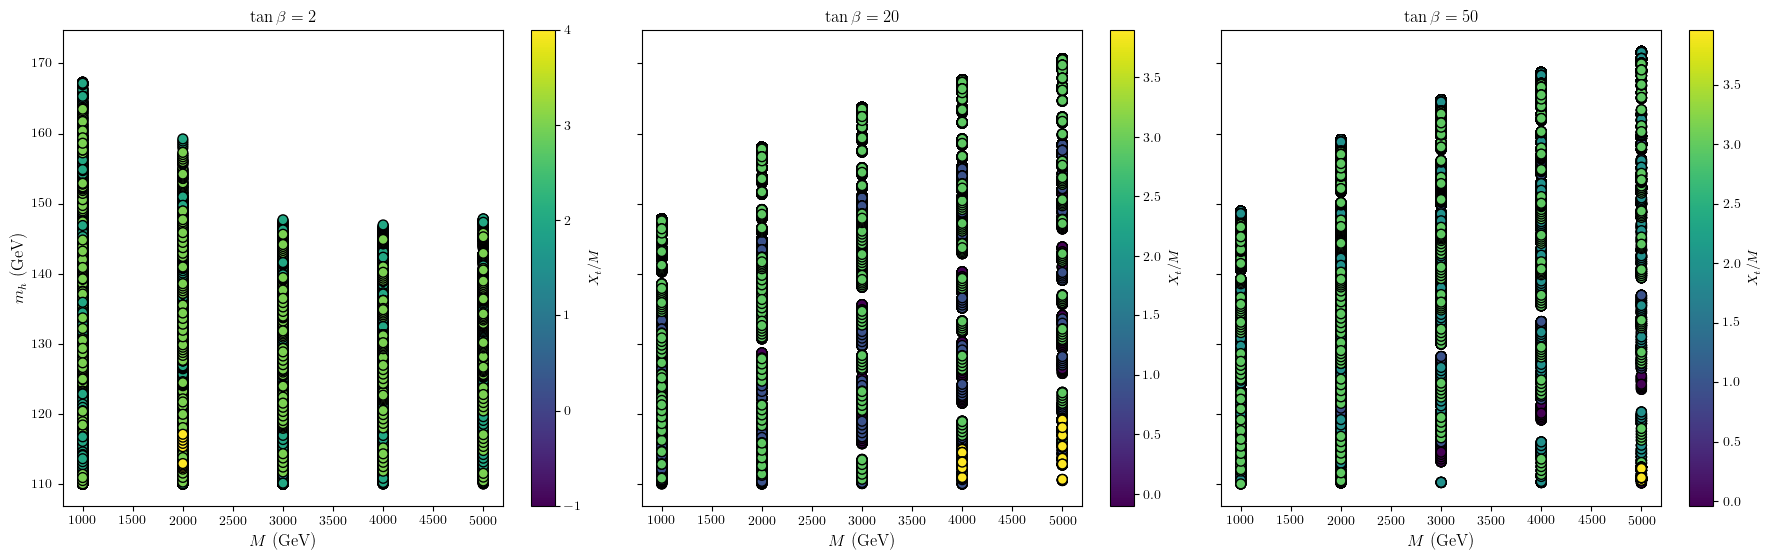

In [18]:
# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( aux_gen_tb2['M'], np.sqrt(aux_gen_tb2['s11']), c = aux_gen_tb2['Xt/M'], cmap='viridis' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =2$')
axes[0].set_xlabel(r'$M$ (GeV)', fontsize=12)
axes[0].set_ylabel(r'$m_h$ (GeV)', fontsize=12)

fig.colorbar(scatter1, ax=axes[0], label=r'$X_t / M$')

# Panel 2
scatter2 = axes[1].scatter( aux_gen_tb20['M'], np.sqrt(aux_gen_tb20['s11']), c = aux_gen_tb20['Xt/M'], cmap='viridis' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$')
axes[1].set_xlabel(r'$M$ (GeV)', fontsize=12)
#axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)

fig.colorbar(scatter2, ax=axes[1], label=r'$X_t / M$')

# Panel 3
scatter3 = axes[2].scatter( aux_gen_tb50['M'], np.sqrt(aux_gen_tb50['s11']), c = aux_gen_tb50['Xt/M'] , cmap='viridis' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =50$')
axes[2].set_xlabel(r'$M$ (GeV)', fontsize=12)
#axes[2].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)

fig.colorbar(scatter3, ax=axes[2], label=r'$X_t / M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [17]:
np.unique(aux_gen_tb20[aux_gen_tb20['M'] ==2000]['kappa'])

array([0.001, 0.101, 0.201, 0.301, 0.401, 0.501, 0.601, 0.701])

In [18]:
np.unique(aux_gen_tb20[aux_gen_tb20['M'] ==2000]['lam'])

array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61])

In [28]:
np.unique(aux_gen_tb20[aux_gen_tb20['M'] ==2000]['n'])

array([0, 1, 2, 3])

In [20]:
np.unique(aux_gen_tb20[aux_gen_tb20['M'] ==2000]['Ak'])

array([-1000,  -750,  -500,  -250,     0])

In [21]:
np.unique(aux_gen_tb20[aux_gen_tb20['M'] ==2000]['mA'])

array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000, 2200,
       2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400,
       4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000])

### NMSSM points sampled for $\kappa ,  A_{\kappa} \neq 0$ and $\mu = 0.7 \cdot M$--- using 1-loop analytic expression from 1703.07800

In [2]:
df0p7M = pd.read_csv('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/sampling_points_expressions_1703p07800_mu0p7M.csv')
df0p7M.head(2)

,M,mA,n,Ak,kappa,lam,s11,s22,s33
0,1000,0,0,-1000,0.001,0.01,-50496.126497,10862.426237,5.440533
1,1000,0,0,-1000,0.001,0.11,30339.880441,-25840.580836,70.636862


In [11]:
aux0p7 = df0p7M[(df0p7M['M'] == 1000) & (df0p7M['s11'] > 100 * 100 ) & (df0p7M['s11'] < 200 * 200 ) & (df0p7M['s22'] > df0p7M['s11'] ) & ( df0p7M['s33'] > df0p7M['s11'])]


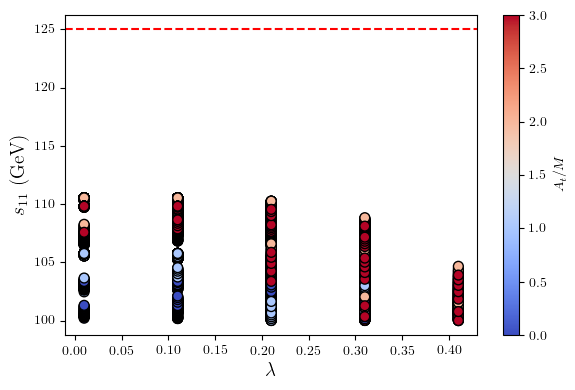

In [12]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(aux0p7['lam'], np.sqrt(aux0p7['s11']), c=aux0p7['n'], cmap='coolwarm',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$A_t/M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$s_{11}$ (GeV)', fontsize=14)
# plt.ylim(-60e+3,60e+3)
# plt.xlim(0,1000)
plt.axhline(y=125  , color='red', linestyle='--')
plt.tight_layout()
plt.show()


# Use NMSSMTools to scan the same parameter space

In [5]:
os.chdir('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/')
nmssmtools = NMSSMFileHandler('inpTest.dat')

nmssm_params = pd.DataFrame({
    'lam': pd.Series(dtype='float'),
    'kappa': pd.Series(dtype='float'),
    'mA': pd.Series(dtype='float'),
    'Ak' : pd.Series(dtype='float'),
    'M1' : pd.Series(dtype='float'),
    'M2' : pd.Series(dtype='float'),
    'M3' : pd.Series(dtype='float'),
    'mhiggs': pd.Series(dtype='object'),
    'mhmix': pd.Series(dtype='object')
})

for LAM in [0.01, 0.21]:
    for kappa in [0.101, 0.2]:
        for mA in np.arange(0,6001, 200):
            for Ak in [2000, 3000]:
                for M3 in [1500, 2000, 2500, 3000]:
                    nmssmtools.update_nmssm_params(LAM, kappa, 20 , 3 * 1000, Ak, mA, 3000, 1000, 1500, M3 )
                    with open('output_trial_log_file.log', 'w') as f:
                    # Run the command and redirect both stdout and stderr to the file
                        subprocess.run('./run inpTest.dat', stdout=f, stderr=f, shell=True)
                    mass_array = nmssmtools.find_higgs_mass('spectrTest.dat')
                    matrix = nmssmtools.find_mixing_terms('spectrTest.dat')
                    new_row = pd.DataFrame({'lam': [LAM], 'kappa': [kappa], 'mA': [mA], 'Ak' :[Ak], 'M1' :[3000], 'M2' :[3000], 'M3' :[M3], 'mhiggs': [mass_array], 'mhmix': [matrix]})
                    nmssm_params = pd.concat([nmssm_params, new_row], ignore_index=True)

                    

File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTest.dat' successfully updated with LAM=0.01, kappa=0.101, tanb=20
File 'inpTes

In [6]:
np.unique(nmssm_params['mhiggs'])

array([list([None, None, None])], dtype=object)

In [22]:
os.chdir('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/')
nmssmtools = NMSSMFileHandler('inptest.dat')

In [23]:
## M = 2000 GeV
nmssm_params = pd.DataFrame({
    'lam': pd.Series(dtype='float'),
    'kappa': pd.Series(dtype='float'),
    'mA': pd.Series(dtype='float'),
    'Ak' : pd.Series(dtype='float'),
    'mhiggs': pd.Series(dtype='object'),
    'mhmix': pd.Series(dtype='object')
})

for LAM in np.unique(aux_gen_tb20[aux_gen_tb20['M'] ==2000]['lam']):
    for kappa in np.unique(aux_gen_tb20[aux_gen_tb20['M'] ==2000]['kappa']):
        for mA in np.unique(aux_gen_tb20[aux_gen_tb20['M'] ==2000]['mA'])[25:]:
            for Ak in np.unique(aux_gen_tb20[(aux_gen_tb20['M'] ==2000) ]['Ak']):
                nmssmtools.update_nmssm_params(LAM, kappa, 20 , 3 * 2000, Ak, mA )
                with open('output_trial_log_file.log', 'w') as f:
                # Run the command and redirect both stdout and stderr to the file
                    subprocess.run('./run inptest.dat', stdout=f, stderr=f, shell=True)
                mass_array = nmssmtools.find_higgs_mass('spectrtest.dat')
                matrix = nmssmtools.find_mixing_terms('spectrtest.dat')
                new_row = pd.DataFrame({'lam': [LAM], 'kappa': [kappa], 'mA': [mA], 'Ak' :[Ak], 'mhiggs': [mass_array], 'mhmix': [matrix]})
                nmssm_params = pd.concat([nmssm_params, new_row], ignore_index=True)

An error occurred: [Errno 2] No such file or directory: 'inptest.dat'
An error occurred: [Errno 2] No such file or directory: 'spectrtest.dat'
An error occurred: [Errno 2] No such file or directory: 'spectrtest.dat'
An error occurred: [Errno 2] No such file or directory: 'inptest.dat'
An error occurred: [Errno 2] No such file or directory: 'spectrtest.dat'
An error occurred: [Errno 2] No such file or directory: 'spectrtest.dat'
An error occurred: [Errno 2] No such file or directory: 'inptest.dat'
An error occurred: [Errno 2] No such file or directory: 'spectrtest.dat'
An error occurred: [Errno 2] No such file or directory: 'spectrtest.dat'
An error occurred: [Errno 2] No such file or directory: 'inptest.dat'
An error occurred: [Errno 2] No such file or directory: 'spectrtest.dat'
An error occurred: [Errno 2] No such file or directory: 'spectrtest.dat'
An error occurred: [Errno 2] No such file or directory: 'inptest.dat'
An error occurred: [Errno 2] No such file or directory: 'spectrtes

In [39]:
# nmssm_params = nmssm_params.copy()
# nmssm_params['Xt/M'] = nmssm_params['n'] - 2 / 20 
# nmssm_params.head(2)

In [38]:
# # heat map without interpolation
# plt.figure(figsize=(6, 4))
# scatter = plt.scatter(nmssm_params['lam'],  nmssm_params['mhiggs'].apply(lambda x: x[0]).values, c=nmssm_params['Xt/M'], cmap='hot',s=50,  edgecolor='k')
# plt.colorbar(scatter, label=r'$X_t / M$')

# plt.xlabel(r'$\lambda$', fontsize=14)
# plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
# plt.title(r'$(\tan \beta, M, m_A) = (20, 2000, 2000)$ ', fontsize=15, weight='bold')
# plt.axhline(y=125, color='black', linestyle=':')
# plt.tight_layout()
# plt.show()

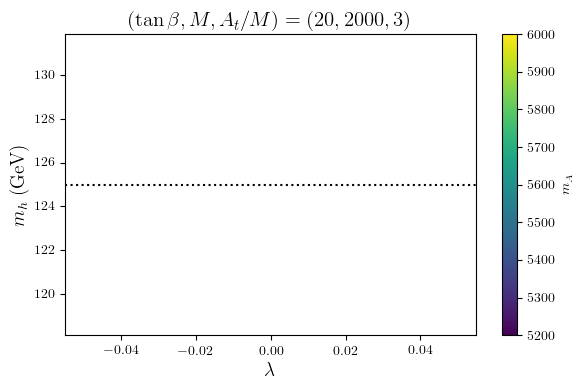

In [21]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(nmssm_params['lam'],  nmssm_params['mhiggs'].apply(lambda x: x[0]).values, c=nmssm_params['mA'], cmap='viridis',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$m_A$')
plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M, A_t/M) = (20, 2000, 3)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
#plt.ylim(122,128)
plt.tight_layout()
plt.show()

In [12]:
np.unique(aux_gen_tb20[aux_gen_tb20['M'] == 1000]['mA'])

array([2000])

In [17]:
## M = 1000 GeV

nmssm_params = pd.DataFrame({
    'lam': pd.Series(dtype='float'),
    'kappa': pd.Series(dtype='float'),
    'n': pd.Series(dtype='float'),
    'Ak' : pd.Series(dtype='float'),
    'mhiggs': pd.Series(dtype='object'),
    'mhmix': pd.Series(dtype='object')
})

for LAM in np.unique(aux_gen_tb20[aux_gen_tb20['M'] == 1000]['lam']):
    for kappa in np.unique(aux_gen_tb20[aux_gen_tb20['M'] == 1000]['kappa']):
        for n in np.unique(aux_gen_tb20[aux_gen_tb20['M'] == 1000]['n']):
            for Ak in np.unique(aux_gen_tb20[(aux_gen_tb20['M'] == 1000) ]['Ak']):
                nmssmtools.update_nmssm_params(LAM, kappa, 20 , n * 1000, Ak, 2000 )
                with open('output_trial_log_file.log', 'w') as f:
                # Run the command and redirect both stdout and stderr to the file
                    subprocess.run('./run inptest.dat', stdout=f, stderr=f, shell=True)
                mass_array = nmssmtools.find_higgs_mass('spectrtest.dat')
                matrix = nmssmtools.find_mixing_terms('spectrtest.dat')
                new_row = pd.DataFrame({'lam': [LAM], 'kappa': [kappa], 'n': [n], 'Ak' :[Ak], 'mhiggs': [mass_array], 'mhmix': [matrix]})
                nmssm_params = pd.concat([nmssm_params, new_row], ignore_index=True)

File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptest.dat' successfully updated with LAM=0.01, kappa=0.001, tanb=20
File 'inptes

In [18]:
nmssm_params = nmssm_params.copy()
nmssm_params['Xt/M'] = nmssm_params['n'] - 2 / 20 
nmssm_params.head(2)

,lam,kappa,n,Ak,mhiggs,mhmix,Xt/M
0,0.01,0.001,0.0,-1000.0,"[None, None, None]","[[None, None, None], [None, None, None], [None...",-0.1
1,0.01,0.001,0.0,-750.0,"[136.715271, 69.5092776, 1968.43533]","[[-0.0306926515, -0.61253507, 0.789847295], [0...",-0.1


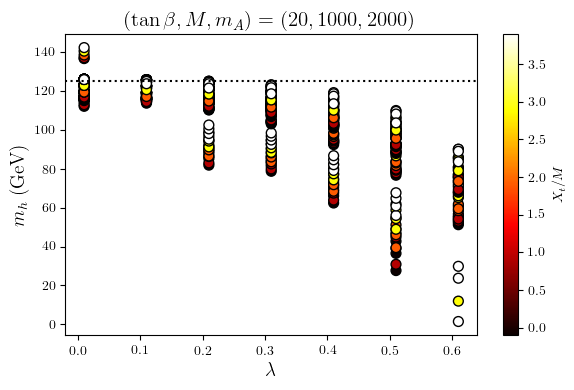

In [19]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(nmssm_params['lam'],  nmssm_params['mhiggs'].apply(lambda x: x[0]).values, c=nmssm_params['Xt/M'], cmap='hot',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M, m_A) = (20, 1000, 2000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

In [20]:
np.unique(aux_gen_tb20[aux_gen_tb20['M'] == 3000]['mA'])

array([2000])

In [21]:
# M = 3000 GeV 

nmssm_params = pd.DataFrame({
    'lam': pd.Series(dtype='float'),
    'kappa': pd.Series(dtype='float'),
    'n': pd.Series(dtype='float'),
    'Ak' : pd.Series(dtype='float'),
    'mhiggs': pd.Series(dtype='object'),
    'mhmix': pd.Series(dtype='object')
})

for LAM in np.unique(aux_gen_tb20[aux_gen_tb20['M'] == 3000]['lam']):
    for kappa in np.unique(aux_gen_tb20[aux_gen_tb20['M'] == 3000]['kappa']):
        for n in np.unique(aux_gen_tb20[aux_gen_tb20['M'] == 3000]['n']):
            for Ak in np.unique(aux_gen_tb20[(aux_gen_tb20['M'] == 3000) ]['Ak']):
                nmssmtools.update_nmssm_params(LAM, kappa, 20 , n * 3000, Ak, 2000 )
                with open('output_trial_log_file.log', 'w') as f:
                # Run the command and redirect both stdout and stderr to the file
                    subprocess.run('./run inptest.dat', stdout=f, stderr=f, shell=True)
                mass_array = nmssmtools.find_higgs_mass('spectrtest.dat')
                matrix = nmssmtools.find_mixing_terms('spectrtest.dat')
                new_row = pd.DataFrame({'lam': [LAM], 'kappa': [kappa], 'n': [n], 'Ak' :[Ak], 'mhiggs': [mass_array], 'mhmix': [matrix]})
                nmssm_params = pd.concat([nmssm_params, new_row], ignore_index=True)

File 'inptest.dat' successfully updated with LAM=0.21, kappa=0.101, tanb=20
File 'inptest.dat' successfully updated with LAM=0.21, kappa=0.101, tanb=20
File 'inptest.dat' successfully updated with LAM=0.21, kappa=0.101, tanb=20
File 'inptest.dat' successfully updated with LAM=0.21, kappa=0.101, tanb=20
File 'inptest.dat' successfully updated with LAM=0.21, kappa=0.101, tanb=20


In [22]:
nmssm_params = nmssm_params.copy()
nmssm_params['Xt/M'] = nmssm_params['n'] - 2 / 20 
nmssm_params.head(2)

,lam,kappa,n,Ak,mhiggs,mhmix,Xt/M
0,0.21,0.101,4.0,-1000.0,"[52.851463, 2716.14601, 5504.16759]","[[0.0489657325, 0.998710776, -0.0133844283], [...",3.9
1,0.21,0.101,4.0,-750.0,"[53.9562582, 2716.14865, 5569.3036]","[[0.0489702782, 0.998714677, -0.0130731193], [...",3.9


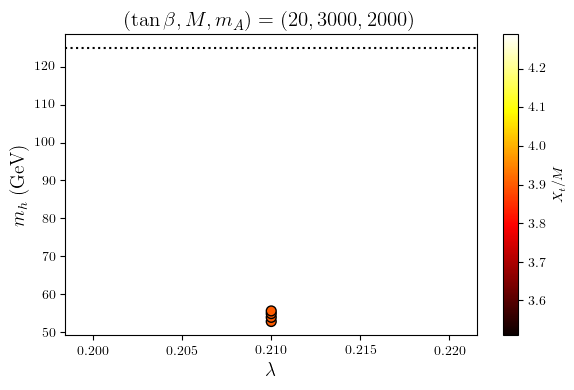

In [23]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(nmssm_params['lam'],  nmssm_params['mhiggs'].apply(lambda x: x[0]).values, c=nmssm_params['Xt/M'], cmap='hot',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M, m_A) = (20, 3000, 2000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

# NMSSM points sampled for $\kappa$, $A_{\kappa}$ $ \neq  0$ and $\mu = 3M$ --- using 1-loop analytic expression from 1703.07800

In [5]:
df3M = pd.read_csv('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/nonzero_kappa_sampling_points_expressions_1703p07800_mu3M.csv')
df3M.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
0,1,1000,0,2,0.001,0.01,-1000,6.166247e+04,645.198743,6485.268281
1,1,1000,0,2,0.101,0.01,-1000,3.642060e+09,2219.228260,6573.367316


In [6]:
df3M_1Kaux = df3M[ (df3M['tb'] == 5) & (df3M['M'] == 5000) & (df3M['s11'] >= 100*100) & (df3M['s11'] <= 200 * 200) & (df3M['s22'] > df3M['s11']) & (df3M['s33'] > df3M['s11'])]
df3M_1Kaux.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
2095200,5,5000,800,4,0.001,0.01,-1000,21738.332307,7.500351e+06,618016.804399
2095208,5,5000,800,4,0.001,0.01,-750,21755.053875,7.875334e+06,618016.848807


In [7]:
df2M_1Kaux = kappa_nmssmDF[(kappa_nmssmDF['tb'] == 5) & (kappa_nmssmDF['M'] == 5000) & (kappa_nmssmDF['s11'] <= 200 * 200) & (kappa_nmssmDF['s11'] >= 100 * 100) & (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['s33'] > kappa_nmssmDF['s11'])]
df2M_1Kaux.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
2096000,5,5000,800,4,0.001,0.01,-1000,18631.846824,3.000391e+06,628250.941040
2096008,5,5000,800,4,0.001,0.01,-750,18662.038711,3.250361e+06,628251.049768


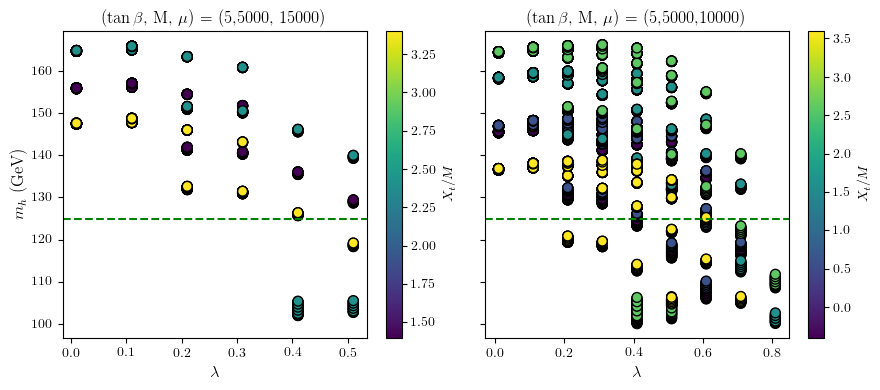

In [72]:
# Set up the figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( df3M_1Kaux['lam'], np.sqrt(df3M_1Kaux['s11']), c = df3M_1Kaux['n'] -3/5, cmap='viridis' , s=50, edgecolor='k')
axes[0].set_title(r'($\tan \beta$, M, $\mu$) = (5,5000, 15000)')
axes[0].set_xlabel(r'$\lambda$', fontsize=12)
axes[0].set_ylabel(r'$m_h$ (GeV)', fontsize=12)
axes[0].axhline(y=125, color='green', linestyle='--')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t / M$')

# Panel 2
scatter2 = axes[1].scatter( df2M_1Kaux['lam'], np.sqrt(df2M_1Kaux['s11']), c = df2M_1Kaux['n'] -2/5, cmap='viridis' , s=50, edgecolor='k')
axes[1].set_title(r'($\tan \beta$, M, $\mu$) = (5,5000,10000)')
axes[1].set_xlabel(r'$\lambda$ ', fontsize=12)
axes[1].axhline(y=125, color='green', linestyle='--')
#axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)

fig.colorbar(scatter2, ax=axes[1], label=r'$X_t / M$')

# Adjust layout
plt.tight_layout()#rect=[0, 0, 1, 0.95])
plt.savefig("/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/plots/sampling_1703p07800_mu3M_vs_2M_M5000_tanb5.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [8]:
df3M_lam = df3M[ (df3M['tb'] == 20) & (df3M['M'] == 5000) & (df3M['lam'] == 0.21) & (df3M['s11'] >= 100*100) & (df3M['s11'] <= 200 * 200) & (df3M['s22'] > df3M['s11']) & (df3M['s33'] > df3M['s11'])]
df3M_lam.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
8646481,20,5000,3800,2,0.101,0.21,-1000,23270.017363,2.009754e+08,1.443419e+07
8646489,20,5000,3800,2,0.101,0.21,-750,23320.643687,2.027789e+08,1.443419e+07


In [9]:
df2M_lam = kappa_nmssmDF[(kappa_nmssmDF['tb'] == 20) & (kappa_nmssmDF['M'] == 5000) & (kappa_nmssmDF['lam']==0.21) & (kappa_nmssmDF['s11'] <= 200 * 200) & (kappa_nmssmDF['s11'] >= 100 * 100) & (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['s33'] > kappa_nmssmDF['s11'])]
df2M_lam.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
8632481,20,5000,2800,0,0.101,0.21,-1000,17661.667035,8.772271e+07,7.839689e+06
8632489,20,5000,2800,0,0.101,0.21,-750,17740.047315,8.892500e+07,7.839694e+06


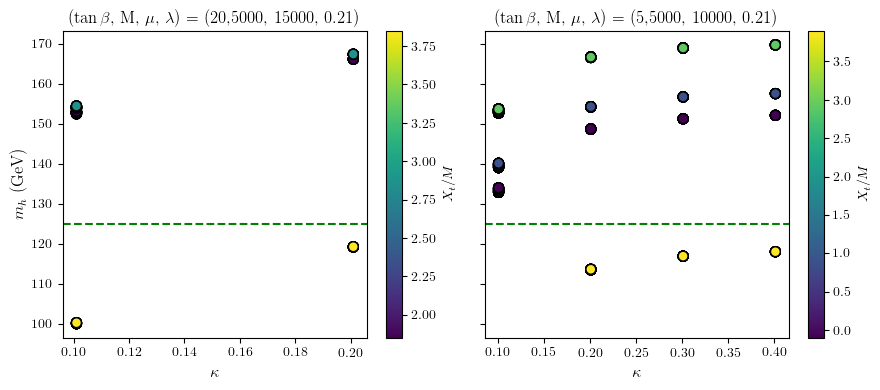

In [69]:
# Set up the figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( df3M_lam['kappa'], np.sqrt(df3M_lam['s11']), c = df3M_lam['n'] -3/20, cmap='viridis' , s=50, edgecolor='k')
axes[0].set_title(r'($\tan \beta$, M, $\mu$, $\lambda$) = (20,5000, 15000, 0.21)')
axes[0].set_xlabel(r'$\kappa$', fontsize=12)
axes[0].set_ylabel(r'$m_h$ (GeV)', fontsize=12)
axes[0].axhline(y=125, color='green', linestyle='--')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t / M$')

# Panel 2
scatter2 = axes[1].scatter( df2M_lam['kappa'], np.sqrt(df2M_lam['s11']), c = df2M_lam['n'] -2/20, cmap='viridis' , s=50, edgecolor='k')
axes[1].set_title(r'($\tan \beta$, M, $\mu$, $\lambda$) = (5,5000, 10000, 0.21)')
axes[1].set_xlabel(r'$\kappa$ ', fontsize=12)
axes[1].axhline(y=125, color='green', linestyle='--')
#axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)

fig.colorbar(scatter2, ax=axes[1], label=r'$X_t / M$')

# Adjust layout
plt.tight_layout()#rect=[0, 0, 1, 0.95])
plt.show()

In [50]:
df3M_kappa = df3M[ (df3M['tb'] == 20) & (df3M['M'] == 1000) & (df3M['lam'] == 0.21) & (df3M['kappa'] == 0.101) & (df3M['s11'] >= 100*100) & (df3M['s11'] <= 200 * 200) & (df3M['s22'] > df3M['s11']) & (df3M['s33'] > df3M['s11'])]
df3M_kappa.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
8262881,20,1000,1200,2,0.101,0.21,-1000,15032.981993,6.891635e+06,1.434024e+06
8262889,20,1000,1200,2,0.101,0.21,-750,15364.833599,7.251986e+06,1.434057e+06


In [51]:
df2M_kappa = kappa_nmssmDF[(kappa_nmssmDF['tb'] == 20) & (kappa_nmssmDF['M'] == 1000) &(kappa_nmssmDF['kappa'] == 0.101) & (kappa_nmssmDF['lam']==0.21) & (kappa_nmssmDF['s11'] <= 200 * 200) & (kappa_nmssmDF['s11'] >= 100 * 100) & (kappa_nmssmDF['s22'] > kappa_nmssmDF['s11']) & (kappa_nmssmDF['s33'] > kappa_nmssmDF['s11'])]
df2M_kappa.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
8260481,20,1000,1000,1,0.101,0.21,-1000,10424.091111,2.747287e+06,998921.592917
8260489,20,1000,1000,1,0.101,0.21,-750,11025.868185,2.987073e+06,999010.007124


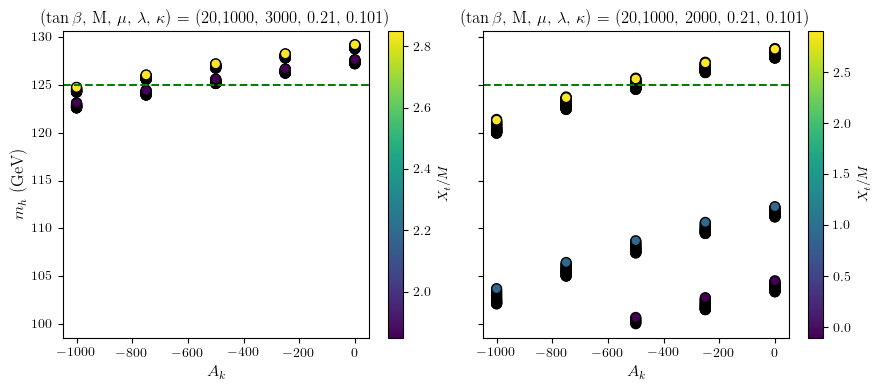

In [53]:
# Set up the figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( df3M_kappa['Ak'], np.sqrt(df3M_kappa['s11']), c = df3M_kappa['n'] -3/20, cmap='viridis' , s=50, edgecolor='k')
axes[0].set_title(r'($\tan \beta$, M, $\mu$, $\lambda$, $\kappa$) = (20,1000, 3000, 0.21, 0.101)')
axes[0].set_xlabel(r'$A_k$', fontsize=12)
axes[0].set_ylabel(r'$m_h$ (GeV)', fontsize=12)
axes[0].axhline(y=125, color='green', linestyle='--')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t / M$')

# Panel 2
scatter2 = axes[1].scatter( df2M_kappa['Ak'], np.sqrt(df2M_kappa['s11']), c = df2M_kappa['n'] -2/20, cmap='viridis' , s=50, edgecolor='k')
axes[1].set_title(r'($\tan \beta$, M, $\mu$, $\lambda$, $\kappa$) = (20,1000, 2000, 0.21, 0.101)')
axes[1].set_xlabel(r'$A_k$ ', fontsize=12)
axes[1].axhline(y=125, color='green', linestyle='--')
#axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)

fig.colorbar(scatter2, ax=axes[1], label=r'$X_t / M$')

# Adjust layout
plt.tight_layout()#rect=[0, 0, 1, 0.95])
plt.show()

# NMSSM points sampled for $\kappa$, $A_{\kappa}$ $ \neq  0$ and $\mu = 0.7M$ --- using 1-loop analytic expression from 1703.07800

In [4]:
df0p7M = pd.read_csv('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/nonzero_kappa_sampling_points_expressions_1703p07800_mu0p7M.csv')
df0p7M.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
0,1,1000,0,2,0.001,0.01,-1000,1.886550e+03,12741.318080,-50500.845876
1,1,1000,0,2,0.101,0.01,-1000,1.928696e+08,1793.377498,12733.291950


In [5]:
df1K_tb20 = df0p7M[ (df0p7M['tb'] == 20) & (df0p7M['M'] == 1000) & (df0p7M['s11'] >= 100*100) & (df0p7M['s11'] <= 200 * 200) & (df0p7M['s22'] > df0p7M['s11']) & (df0p7M['s33'] > df0p7M['s11'])]
df1K_tb20.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
8248802,20,1000,200,2,0.201,0.01,-1000,22014.982231,39864.711373,7.777896e+08
8248810,20,1000,200,2,0.201,0.01,-750,22014.982241,39864.714798,7.813071e+08


In [6]:
df2K_tb20 = df0p7M[ (df0p7M['tb'] == 20) & (df0p7M['M'] == 2000) & (df0p7M['s11'] >= 100*100) & (df0p7M['s11'] <= 200 * 200) & (df0p7M['s22'] > df0p7M['s11']) & (df0p7M['s33'] > df0p7M['s11'])]
df2K_tb20.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
8335602,20,2000,200,2,0.201,0.01,-1000,25134.094146,39885.310853,3.139298e+09
8335610,20,2000,200,2,0.201,0.01,-750,25134.094153,39885.312535,3.146333e+09


In [7]:
df5K_tb20 = df0p7M[ (df0p7M['tb'] == 20) & (df0p7M['M'] == 5000) & (df0p7M['s11'] >= 100*100) & (df0p7M['s11'] <= 200 * 200) & (df0p7M['s22'] > df0p7M['s11']) & (df0p7M['s33'] > df0p7M['s11'])]
df5K_tb20.head(2)

,tb,M,mA,n,kappa,lam,Ak,s11,s22,s33
8596002,20,5000,200,2,0.201,0.01,-1000,29245.839214,39924.033220,1.972614e+10
8596010,20,5000,200,2,0.201,0.01,-750,29245.839219,39924.033884,1.974373e+10


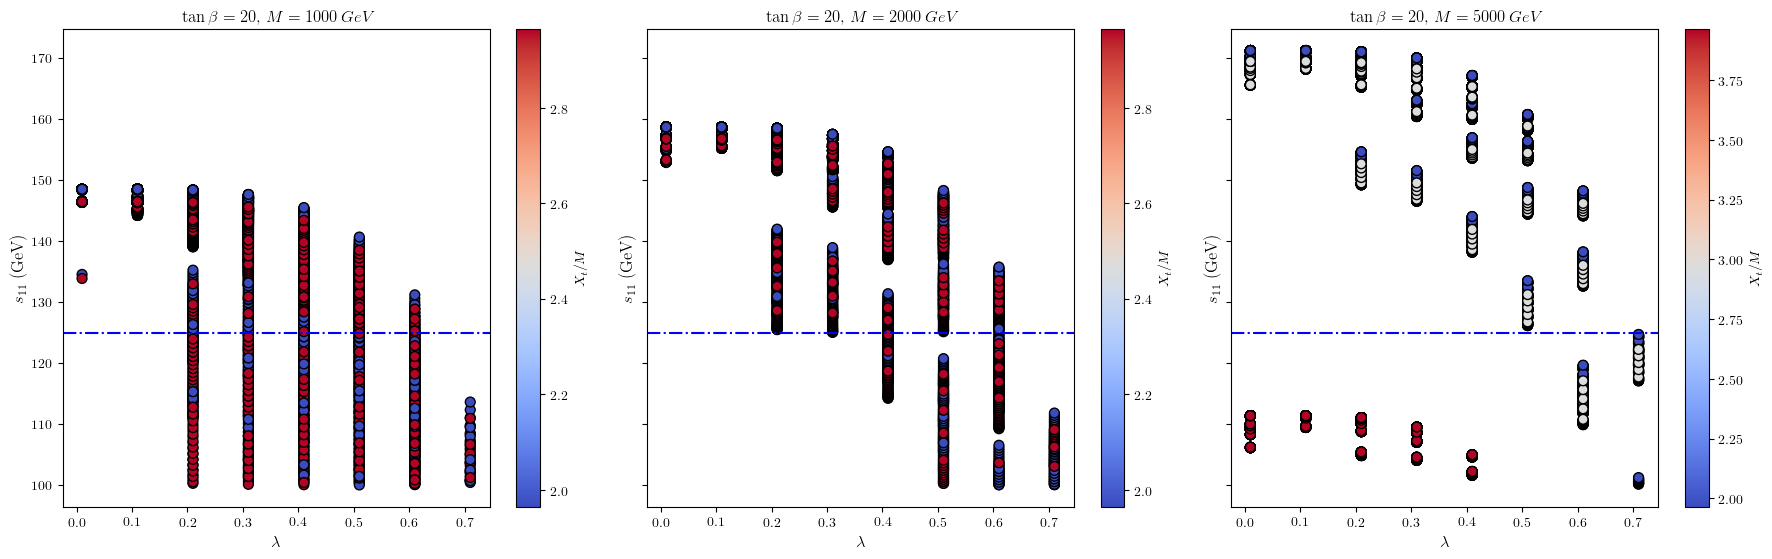

In [8]:
# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( df1K_tb20['lam'], np.sqrt(df1K_tb20['s11']), c =  df1K_tb20['n'] - 0.7/20, cmap='coolwarm' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$')
axes[0].set_xlabel(r'$\lambda$', fontsize=12)
axes[0].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[0].axhline(y=125, color='blue', linestyle='-.')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t/M$')

# Panel 2
scatter2 = axes[1].scatter( df2K_tb20['lam'], np.sqrt(df2K_tb20['s11']), c =  df2K_tb20['n'] - 0.7/20, cmap='coolwarm' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $ M = 2000 \, GeV$')
axes[1].set_xlabel(r'$\lambda$', fontsize=12)
axes[1].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[1].axhline(y=125, color='blue', linestyle='-.')
fig.colorbar(scatter2, ax=axes[1], label=r'$X_t/M$')

# Panel 3
scatter3 = axes[2].scatter( df5K_tb20['lam'], np.sqrt(df5K_tb20['s11']), c =  df5K_tb20['n'] - 0.7/20, cmap='coolwarm' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =20$, $ M = 5000 \, GeV$')
axes[2].set_xlabel(r'$\lambda$', fontsize=12)
axes[2].set_ylabel(r'$s_{11}$ (GeV)', fontsize=12)
axes[2].axhline(y=125, color='blue', linestyle='-.')
fig.colorbar(scatter3, ax=axes[2], label=r'$X_t/M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/plots/sampling_1703p07800_mu0p7M_tanb20.pdf", format="pdf", bbox_inches="tight")
plt.show()


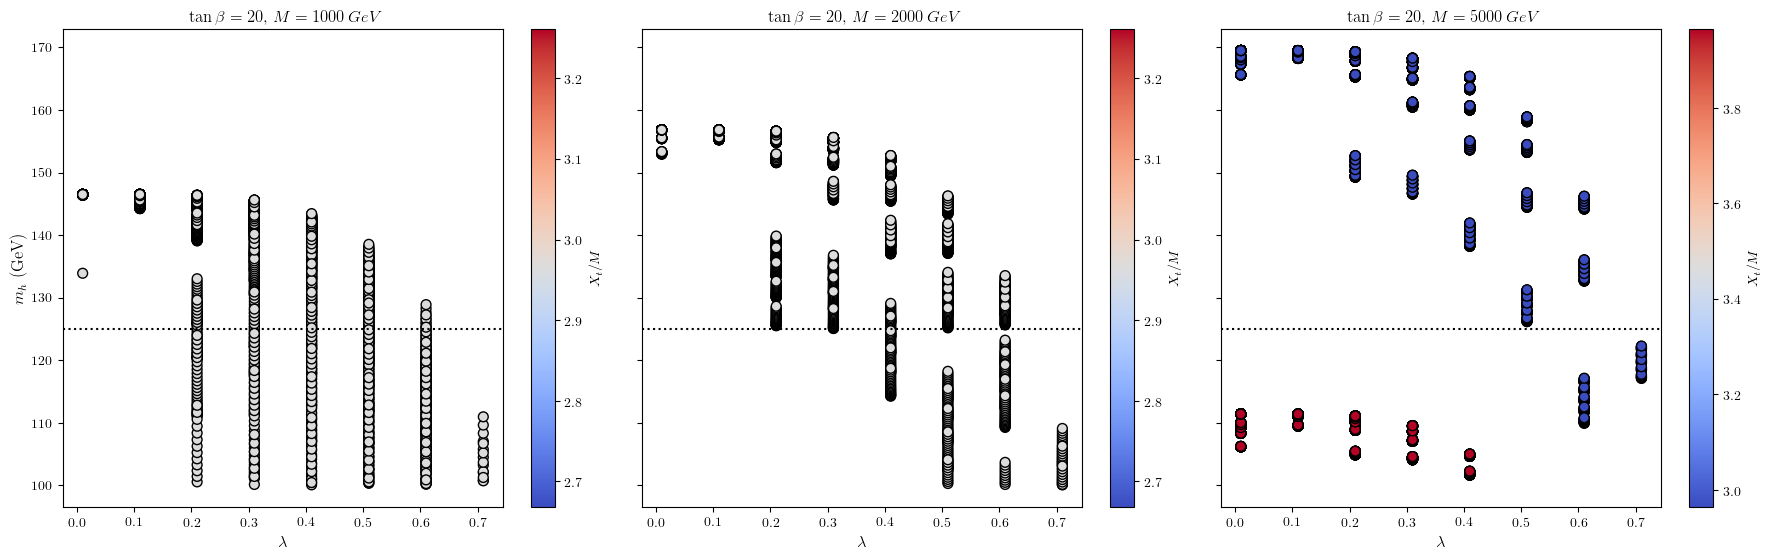

In [11]:
# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter( df1K_tb20[df1K_tb20['n']>=2.8]['lam'], np.sqrt(df1K_tb20[df1K_tb20['n']>=2.8]['s11']), c =  df1K_tb20[df1K_tb20['n']>=2.8]['n'] - 0.7/20, cmap='coolwarm' , s=50, edgecolor='k')
axes[0].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$')
axes[0].set_xlabel(r'$\lambda$', fontsize=12)
axes[0].set_ylabel(r'$m_h$ (GeV)', fontsize=12)
axes[0].axhline(y=125, color='black', linestyle=':')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t/M$')

# Panel 2
scatter2 = axes[1].scatter( df2K_tb20[df2K_tb20['n'] >= 2.8]['lam'], np.sqrt(df2K_tb20[df2K_tb20['n'] >= 2.8]['s11']), c =  df2K_tb20[df2K_tb20['n'] >= 2.8]['n'] - 0.7/20, cmap='coolwarm' , s=50, edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $ M = 2000 \, GeV$')
axes[1].set_xlabel(r'$\lambda$', fontsize=12)
axes[1].axhline(y=125, color='black', linestyle=':')
fig.colorbar(scatter2, ax=axes[1], label=r'$X_t/M$')

# Panel 3
scatter3 = axes[2].scatter( df5K_tb20[df5K_tb20['n'] >= 2.8]['lam'], np.sqrt(df5K_tb20[df5K_tb20['n'] >= 2.8]['s11']), c =  df5K_tb20[df5K_tb20['n'] >= 2.8]['n'] - 0.7/20, cmap='coolwarm' , s=50, edgecolor='k')
axes[2].set_title(r'$\tan \beta =20$, $ M = 5000 \, GeV$')
axes[2].set_xlabel(r'$\lambda$', fontsize=12)
axes[2].axhline(y=125, color='black', linestyle=':')
fig.colorbar(scatter3, ax=axes[2], label=r'$X_t/M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("/mnt/c/Users/asgia/Downloads/analytic_sampling_NMSSM_tanb20_mu0p7M.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/plots/sampling_1703p07800_mu0p7M_tanb20.pdf", format="pdf", bbox_inches="tight")
plt.show()
